In [5]:
using PyPlot, DelimitedFiles, Interpolations
RawData = (open(readdlm,"/Users/jayyao/Documents/Research/LDOS/Materials/METALS_Silver_Palik.txt"))
N = size(RawData)[1]-1

Lambda = RawData[2:end,1]
n = RawData[2:end,2]
k = RawData[2:end,3]

Omega = 2*π*3e8./Lambda*1e6
Epsilon = (n+1im*k).^2

A_x = Omega[end:-1:1]
knots = (A_x,)
Εr = real(Epsilon[end:-1:1])
Εi = imag(Epsilon[end:-1:1])
itpr = interpolate(knots, Εr, Gridded(Linear()))
itpi = interpolate(knots, Εi, Gridded(Linear()))
N = 200
lambda = range(200,stop=1200,length=N)/1e9
omega = zeros(N)
epsilon = zeros(Complex,N)
d = 10e-9
for i=1:N
    k = 2*π/lambda[i]
    ω = k*3e8
    omega[i] = ω
    ϵ = itpr[ω]+itpi[ω]*1im-1
    epsilon[i] = ϵ
end
plot(lambda*1e9,real(epsilon),".-",label="real")
#plot([200,400],[0.5,0.5])
#lambdap = 334
#plot([lambdap,lambdap],[0.0,0.65])
plot(lambda*1e9,imag(epsilon),".-",label="imag")
#xlim([300,350])
xlabel("ω")
ylabel("ϵ")
legend()

┌ Info: Precompiling Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1192
┌ Warning: Module Compat with build ID 3697821337001 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Warning: Module Compat with build ID 3697821337001 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling AxisAlgorithms [13072b0f-2c55-5437-9ae7-d433b7a33950]
└ @ Base loading.jl:1192
┌ Warning: Module Compat with build ID 3697821337001 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling OffsetArrays [6fe1bfb0-de20-5000-8ca7-80f57d26f881]
└ @ Base loading

SystemError: SystemError: opening file /Users/jayyao/Documents/Research/LDOS/Materials/METALS_Silver_Palik.txt: No such file or directory

In [4]:
using Pkg
Pkg.add("Interpolations")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %Fetching: [======>                                  ]  14.0 %>                             ]  26.2 %Fetching: [===============>                         ]  37.4 %Fetching: [=====================>                   ]  51.3 %Fetching: [========================>                ]  59.3 %Fetching: [================================>        ]  78.1 %Fetching: [======================================>  ]  93.5 %.6 % Resolving package versions...
 Installed Compat ───────────── v2.1.0
 Installed AxisAlgorithms ───── v0.3.0
 Installed WoodburyMatrices ─── v0.4.1
 Installed Conda ────────────── v1.2.0
 Installed CSTParser ────────── v0.5.2
 Installed PyCall ───────────── v1.91.2
 Installed BinaryProvider ───── v0.5.4
 Installed OrderedCollections ─ v1.1.0
 Installed OffsetArrays ─────── v0.11.0
 Installed SoftGlob

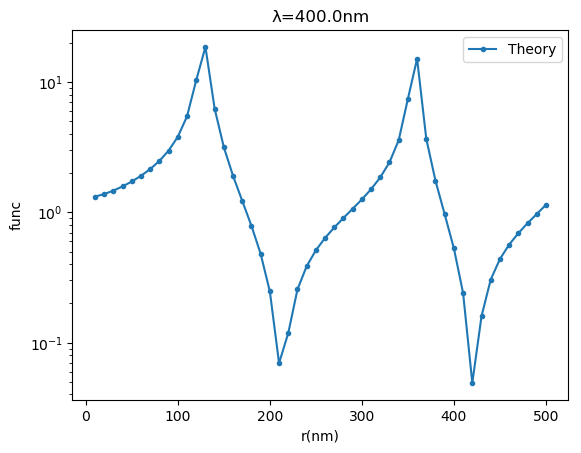

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6


PyObject <matplotlib.legend.Legend object at 0x1469b67f0>

In [73]:
using JLD, SpecialFunctions
ρe = load("/Users/jayyao/Documents/Research/LDOS/Program/LDOS02/Sphere_lambda_300_800_d_10_500.jld", "ρe")
λ0 = 400e-9
k0 = 2*π/λ0
ω = k0*3e8
ϵm = itpr[ω]+itpi[ω]*1im
#ϵm = -1.0+0im
ϵd = 1
km = sqrt(ϵm)*k0
kd = sqrt(ϵd)*k0
#a = 1
l = 1
λ=1e-9

fm(x) = ϵm*hankelh1(l+0.5,km*λ*x)*(kd*λ*x*(besselj(l-0.5,kd*λ*x)-besselj(l+1.5,kd*λ*x))+besselj(l+0.5,kd*λ*x))
fd(x) = ϵd*besselj(l+0.5,kd*λ*x)*(km*λ*x*(hankelh1(l-0.5,km*λ*x)-hankelh1(l+1.5,km*λ*x))+hankelh1(l+0.5,km*λ*x))

Na = 50
aA = range(10,stop=500,length=Na)
func2 = zeros(Na)
for i=1:Na
    aa = aA[i]
    func2[i] = 1/abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))
end
semilogy(aA,func2[:],".-",label="Theory")
#semilogy(a,ρe[3,:,1,1],".-",label="Simulation")
xlabel("r(nm)")
ylabel("func")
title("λ=$(λ0*1e9)nm")
legend()


In [83]:
aa = 128
abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))

0.048171001854119926

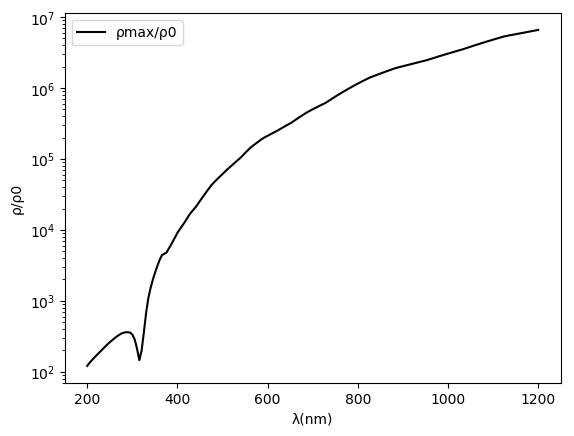

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10


PyObject <matplotlib.legend.Legend object at 0x13a325a90>

In [45]:
Nh = 100
Nd = 1
N = 200
lambda = range(200,stop=1200,length=N)/1e9
ρmax = zeros(N)
for i=1:N
    k = 2*π/lambda[i]
    d = 10e-9
    ω = k*3e8
    ϵ = itpr[ω]+itpi[ω]*1im
    χ = ϵ - 1
    ρmax[i] = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
end

figure(1)
semilogy(lambda*1e9,ρmax,"k-",label="ρmax/ρ0")
#ylim([2,10^3])
#xlim([200,600])
xlabel("λ(nm)")
ylabel("ρ/ρ0")
legend()

In [4]:
λtest = 550e-9
k = 2*π/λtest
d = 203.5e-9
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5


91.7980925911701

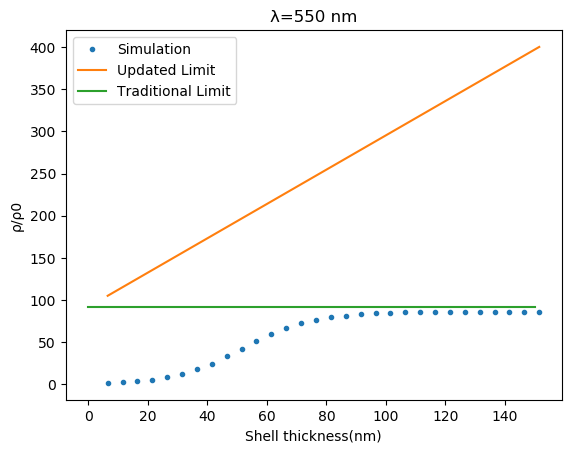

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41


PyObject <matplotlib.legend.Legend object at 0x1471f6048>

In [16]:
#Shell
Data550=[0.21 0.2035 1.71164
0.215 0.2035 2.56629
0.22 0.2035 3.83952
0.225 0.2035 5.72715
0.23 0.2035 8.46805
0.235 0.2035 12.3866
0.24 0.2035 17.6854
0.245 0.2035 24.6482
0.25 0.2035 33.1763
0.255 0.2035 42.4262
0.26 0.2035 51.8841
0.265 0.2035 60.2041
0.27 0.2035 67.089
0.275 0.2035 72.4793
0.28 0.2035 76.5907
0.285 0.2035 79.5634
0.29 0.2035 81.5905
0.295 0.2035 82.9903
0.3 0.2035 84.0981
0.305 0.2035 84.8757
0.31 0.2035 85.2174
0.315 0.2035 85.6322
0.32 0.2035 85.8447
0.325 0.2035 85.996
0.33 0.2035 86.1364
0.335 0.2035 86.1581
0.34 0.2035 86.1845
0.345 0.2035 86.2641
0.35 0.2035 86.2921
0.355 0.2035 86.2576]
d1 = Data550[:,1]
d2 = Data550[:,2]
ρd = Data550[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 550e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=550 nm")
legend()

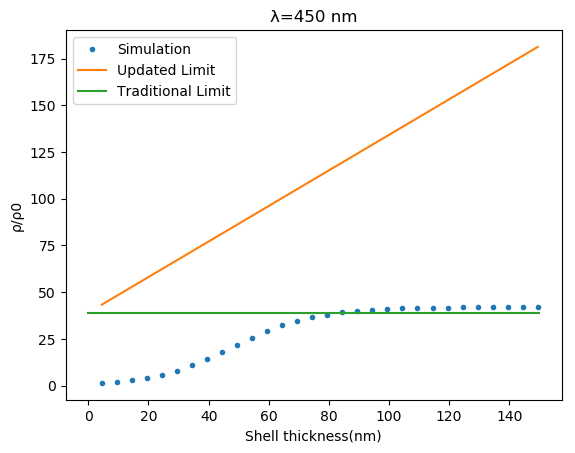

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41


PyObject <matplotlib.legend.Legend object at 0x147564be0>

In [18]:
#Shell
Data450=[0.16 0.1555 1.40688
0.165 0.1555 2.03576
0.17 0.1555 2.92071
0.175 0.1555 4.14975
0.18 0.1555 5.80794
0.185 0.1555 7.99956
0.19 0.1555 10.7772
0.195 0.1555 14.1043
0.2 0.1555 17.8632
0.205 0.1555 21.8028
0.21 0.1555 25.6692
0.215 0.1555 29.1635
0.22 0.1555 32.1762
0.225 0.1555 34.6178
0.23 0.1555 36.5566
0.235 0.1555 38.0216
0.24 0.1555 39.1292
0.245 0.1555 39.9421
0.25 0.1555 40.5365
0.255 0.1555 40.9649
0.26 0.1555 41.2738
0.265 0.1555 41.4948
0.27 0.1555 41.6519
0.275 0.1555 41.7655
0.28 0.1555 41.8454
0.285 0.1555 41.9018
0.29 0.1555 41.9424
0.295 0.1555 41.9711
0.3 0.1555 41.9911
0.305 0.1555 42.0059]
d1 = Data450[:,1]
d2 = Data450[:,2]
ρd = Data450[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 450e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=450 nm")
legend()

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1192
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = __init__() at init.jl:175
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/init.jl:175
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObject) at init.jl:73
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/init.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = find_backend(::PyCall.PyObject) at init.jl:129
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/init.jl:129


┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:117
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:117
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:118
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:118
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = display_figs() at PyPlot.jl:118
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:118
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getprop

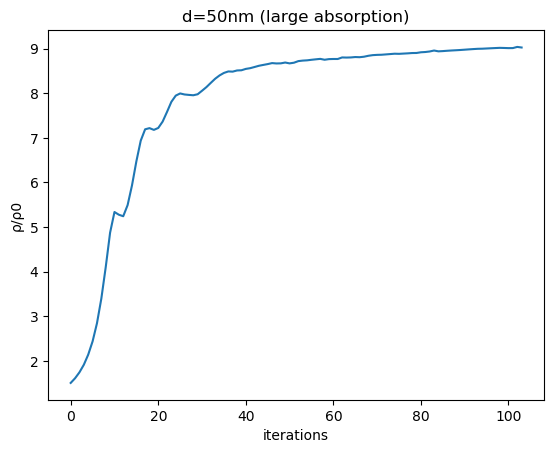

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:73
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:73
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Figure) at PyPlot.jl:77
└ @ PyPlot /Users/jayyao/.julia/packages/PyPlot/mQXSC/src/PyPlot.jl:77
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")},

PyObject Text(0.5, 1.0, 'd=50nm (large absorption)')

In [1]:
using PyPlot
Data = [1.50802 17 0.05 0 1 0.02 0.02 0 0 0 0 0 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.00311067 1.71925 0.085056 0.0431077 -0.0006457 0.000999801 0.000509765 -0.000150256 0.000938509 0.0927413 0.244576 0.498155 0.517289 0.291414 0.31591 0.0837856 
1.61289 17 0.05 0 1.04445 0.0221988 0.0211144 0 0 0 0 0 0.0223975 0.0263227 0.0328781 0.0333727 0.0275335 0.0281668 0.022166 0.00153731 1.96507 0.125177 0.0505173 0.0012755 0.000800695 0.00103424 -0.000893797 0.00114237 0.110473 0.407973 0.787725 0.893607 0.424706 0.467476 0.0964862 
1.74591 17 0.05 0 1.08657 0.0246184 0.0221857 0 0 0 0 0 0.0247237 0.0338562 0.0477038 0.049675 0.0357733 0.037184 0.0242277 0.00124719 2.27484 0.191077 0.0613171 0.00158307 0.00141185 0.000541503 -0.00103531 0.00165165 0.191328 0.640095 1.12635 1.42578 0.597485 0.661282 0.102997 
1.91546 17 0.05 0 1.12601 0.027322 0.0232137 0 0 0 0 0 0.0273782 0.0426016 0.063947 0.0688945 0.0445941 0.0468909 0.0260974 0.00163338 2.6843 0.284437 0.0820007 0.00248933 0.00353876 -0.000661093 0.00259559 0.00175588 0.368754 0.96321 1.53322 2.14864 0.815446 0.916085 0.0922772 
2.14185 17 0.05 0 1.1626 0.0303153 0.0242257 0 0 0 0 0 0.0307494 0.0524925 0.0810826 0.0907852 0.0538166 0.0571302 0.0276632 -0.00114805 3.23796 0.445186 0.110117 0.000861294 0.00244936 0.00142525 -0.00613509 0.000130874 0.715365 1.42713 2.01055 3.16543 1.11837 1.26569 0.0592529 
2.4387 17 0.05 0 1.19629 0.0336744 0.025226 0 0 0 0 0 0.0352491 0.0634451 0.0985107 0.115049 0.0633179 0.0677596 0.0288388 -0.000913711 4.01375 0.667748 0.161747 -0.000642229 0.00143113 -0.00550704 -0.00152418 0.00189029 1.3267 2.0768 2.5673 4.52464 1.51222 1.74704 -0.0438813 
2.84484 17 0.05 0 1.22725 0.0373966 0.0262465 0 0 0 0 0 0.0412597 0.0753436 0.115696 0.141227 0.0729539 0.0786707 0.0294836 -0.00329826 5.10103 1.00252 0.236344 -0.000666562 -0.000749979 -0.00635421 0.00584923 -0.00220825 2.34284 3.01773 3.19162 6.39124 2.05455 2.43484 -0.262784 
3.39893 17 0.05 0 1.25577 0.0414825 0.0273016 0 0 0 0 0 0.0490819 0.0880883 0.13213 0.168848 0.0826167 0.0897955 0.0294533 -0.00172131 6.51043 1.44784 0.317403 0.0118769 -0.00701602 -0.000820743 -0.00464049 0.000772399 3.79972 4.2757 3.78661 8.75444 2.72357 3.3086 -0.681641 
4.10178 17 0.05 0 1.28228 0.0459112 0.0283762 0 0 0 0 0 0.0588173 0.101609 0.147453 0.197523 0.0922339 0.101079 0.0286001 -0.0242763 7.6308 1.7702 0.364322 0.00647577 -0.000526025 -0.0447413 -0.00246875 -0.00102732 5.0453 5.56643 3.98517 10.9604 3.4036 3.95663 -1.35629 
4.87613 17 0.05 0 1.30747 0.0505787 0.0294482 0 0 0 0 0 0.0701482 0.116008 0.161617 0.227279 0.101961 0.112458 0.0267589 0.00330917 6.13476 1.14261 0.0538927 0.0100163 -0.00996903 0.0346111 -0.0071232 0.0120026 3.44646 5.43012 2.88613 10.9941 3.32246 2.85533 -1.7874 
5.33838 17 0.05 0 1.33181 0.0550944 0.0303192 0 0 0 0 0 0.0816466 0.131457 0.174857 0.259022 0.112121 0.123522 0.0239129 0.0160445 -1.01224 -1.6111 -0.991744 0.0164247 0.0195076 -0.006309 -0.00912556 -0.0161287 -4.60384 1.71604 0.362981 6.56677 1.521 -1.89955 -0.608827 
5.27762 17 0.05 0 1.35199 0.0577533 0.0303136 0 0 0 0 0 0.0880349 0.146057 0.186526 0.291337 0.122022 0.131596 0.0210004 -0.046857 -7.65372 -4.45854 -2.09887 -0.0157578 0.0208648 -0.0965036 0.0308781 -0.00718066 -12.4348 -2.13983 -1.00231 2.90492 -0.339922 -6.53937 1.70821 
5.24375 17 0.05 0 1.36281 0.0568742 0.028907 0 0 0 0 0 0.084772 0.156155 0.19507 0.318791 0.129612 0.133602 0.0198421 0.0770049 -8.9451 -5.38982 -2.62451 0.0283539 0.0584214 0.0296381 -0.0454352 0.0150619 -14.463 -2.95313 -0.924742 3.2052 -0.836774 -8.06483 2.96449 
5.49282 17 0.05 0 1.36608 0.0530503 0.0262783 0 0 0 0 0 0.0738026 0.16235 0.201227 0.342169 0.135074 0.130483 0.0206586 0.0284217 -8.59796 -5.50304 -2.96628 0.03303 -0.0235014 0.10729 -0.0294956 -0.0377781 -14.3774 -2.61039 -0.637775 4.47499 -0.99431 -8.67481 3.80805 
5.93438 17 0.05 0 1.36424 0.047099 0.0226127 0 0 0 0 0 0.0574649 0.165985 0.20586 0.363353 0.138959 0.123448 0.0233015 0.0395824 -7.92571 -5.05958 -3.19468 0.0223826 -0.0212583 0.12299 -0.0133644 -0.0325149 -13.2679 -1.76007 -0.347651 5.29963 -1.0825 -9.07222 4.50848 
6.4738 17 0.05 0 1.35891 0.0397331 0.0180382 0 0 0 0 0 0.0375424 0.168155 0.209535 0.383468 0.141662 0.113255 0.0276587 -0.0518109 -6.83964 -3.59577 -3.22113 -0.0235506 -0.00557997 0.021757 0.0241558 -0.0228684 -10.6383 -0.31085 0.0753242 4.75151 -1.11733 -8.9 5.07646 
6.93824 17 0.05 0 1.35122 0.0317897 0.012654 0 0 0 0 0 0.015641 0.16987 0.212714 0.402846 0.143464 0.100472 0.0337041 0.0186079 -5.02783 -0.612589 -2.71929 -0.0264964 -0.0119878 -0.0421688 0.0466787 0.017328 -5.69006 2.42387 0.205098 2.30614 -1.01713 -7.83943 5.09934 
7.19195 17 0.05 0 1.34219 0.0245076 0.00668689 0 0 0 0 0 -0.00622768 0.172467 0.21561 0.420974 0.144599 0.0856862 0.0413197 -0.0310176 -3.07433 3.23688 -2.00464 0.0232248 -0.00866235 -0.0147689 -0.0400005 0.0108994 -0.0440362 5.51864 0.106676 -1.7546 -1.05002 -5.75331 4.60491 
7.21809 17 0.05 0 1.33278 0.0194494 0.000477266 0 0 0 0 0 -0.0257472 0.17723 0.21824 0.436361 0.145145 0.0699508 0.0501521 -0.0163285 -1.73004 6.81139 -0.908599 0.00520491 0.027004 -0.0281076 -0.0348246 -0.00482842 4.76822 8.10353 -0.249121 -6.46068 -0.877021 -3.36136 3.86468 
7.1791 17 0.05 0 1.32374 0.0179508 -0.00538261 0 0 0 0 0 -0.040861 0.184937 0.220447 0.447103 0.145246 0.0546424 0.0596026 -0.0596143 -0.779759 8.62693 -0.0303362 0.0176711 0.0272407 0.0449467 0.0355243 -0.0225847 7.09617 9.55822 -0.647206 -9.17597 -0.545915 -1.69425 3.18962 
7.22201 17 0.05 0 1.31556 0.0202618 -0.0104899 0 0 0 0 0 -0.0510284 0.195641 0.222095 0.452599 0.145105 0.0406234 0.069155 0.00491464 -0.346339 9.29494 0.628702 -0.00583178 0.0882913 -0.0446656 0.00631572 -0.0212297 7.89911 9.95668 -1.05188 -10.2594 -0.353392 -0.621853 2.57998 
7.36468 17 0.05 0 1.30832 0.0260222 -0.0146686 0 0 0 0 0 -0.0566618 0.208953 0.2231 0.453224 0.144839 0.0282053 0.0784877 -0.0624767 0.0257521 8.53904 0.972824 -0.0293144 0.00494303 -0.0333096 -0.0061902 0.0211314 7.52392 9.73976 -1.36387 -9.30797 0.0505025 0.0941408 2.00081 
7.58118 17 0.05 0 1.30198 0.0344276 -0.0179472 0 0 0 0 0 -0.0586387 0.224447 0.223444 0.450111 0.144627 0.0173618 0.0874516 0.0163263 -0.130194 6.82757 1.09192 -0.0361336 0.0274121 0.039015 -0.0388868 0.0124184 6.01326 8.44688 -1.47792 -7.32575 0.278895 0.679024 1.10496 
7.80817 17 0.05 0 1.2963 0.044551 -0.0204375 0 0 0 0 0 -0.0580602 0.2415 0.223176 0.444499 0.144546 0.00798679 0.0958489 -0.00483296 -0.256898 4.14771 0.928023 -0.00757689 -0.0271576 -0.00604898 -0.0796255 0.00337623 3.83258 6.74229 -1.4687 -3.89078 0.883068 1.12622 0.063774 
7.94722 17 0.05 0 1.29108 0.055286 -0.0223206 0 0 0 0 0 -0.0560486 0.259489 0.222363 0.437928 0.144817 -2.28948e-05 0.10344 -0.0108559 -0.705242 1.273 0.492406 -0.0142377 -0.0189733 0.021228 -0.0889759 0.0158118 1.41673 4.81999 -1.28406 -0.521594 1.28734 1.49722 -1.07474 
7.99561 17 0.05 0 1.28606 0.0655273 -0.0238363 0 0 0 0 0 -0.0536675 0.277704 0.221122 0.431761 0.145567 -0.00670465 0.109908 -0.0734759 -1.42603 -1.31089 -0.0884101 0.0241004 0.0269861 -0.0796549 0.00317316 -0.0287983 -0.978656 2.93727 -0.960618 2.12411 1.45934 1.75948 -2.18643 
7.9725 17 0.05 0 1.28094 0.0743098 -0.025248 0 0 0 0 0 -0.0518922 0.295409 0.219615 0.427001 0.146826 -0.0120768 0.114917 -0.0161182 -2.19362 -3.2055 -0.56743 -0.00968296 0.0961896 -0.122639 0.0223011 -0.0381605 -2.84964 1.4319 -0.627534 3.59546 1.64409 1.90094 -3.16796 
7.96281 17 0.05 0 1.27544 0.080988 -0.0267525 0 0 0 0 0 -0.0514191 0.312016 0.217999 0.424121 0.148621 -0.0161857 0.118192 -0.042681 -2.61672 -4.53513 -0.871659 -0.0227817 -0.0110913 -0.0378607 -0.0548036 -0.035868 -3.92686 0.540531 -0.46214 4.62026 1.79698 1.87568 -3.7675 
7.95502 17 0.05 0 1.26942 0.085206 -0.0284593 0 0 0 0 0 -0.0525607 0.327226 0.216357 0.423366 0.15096 -0.0191462 0.119644 -0.0167007 -2.91258 -5.22823 -1.13895 -0.0994645 -0.000573798 -0.00421581 -0.0368758 -0.00229664 -4.43157 -0.088266 -0.239376 4.7717 1.74703 1.7231 -4.13984 
7.9775 17 0.05 0 1.26282 0.0869163 -0.0304538 0 0 0 0 0 -0.0553636 0.340904 0.214779 0.424596 0.153768 -0.0211257 0.119297 -0.00344066 -3.00422 -5.40118 -1.16029 0.108656 -0.000742979 0.0139446 -0.0496155 -0.0215746 -4.47349 -0.442296 -0.207133 4.78769 1.77445 1.65326 -4.17223 
8.05584 17 0.05 0 1.25568 0.086293 -0.0327169 0 0 0 0 0 -0.0596834 0.353056 0.213275 0.427623 0.15701 -0.0222474 0.117311 -0.070536 -2.56863 -5.21227 -1.03644 -0.0218914 -0.00814949 -0.0274475 -0.0413988 -0.00837324 -3.91012 -0.40036 -0.307492 4.86139 1.68062 1.52318 -3.82137 
8.13738 17 0.05 0 1.24819 0.0836348 -0.0351764 0 0 0 0 0 -0.0651548 0.363865 0.211793 0.43231 0.160613 -0.0226475 0.113982 0.0150693 -2.13779 -4.97256 -0.898097 0.00379776 0.00302565 -0.0254389 0.0428761 0.0491583 -3.1375 -0.143018 -0.478497 4.66807 1.57558 1.36626 -3.37364 
8.23256 17 0.05 0 1.24056 0.079223 -0.0377628 0 0 0 0 0 -0.0713689 0.37358 0.21026 0.438434 0.164506 -0.0224575 0.109609 -0.0641159 -1.63372 -4.16834 -0.644879 -0.0493724 -0.0477761 -0.0677728 -0.0499484 0.0826283 -2.27888 0.0649836 -0.653916 4.14595 1.3033 1.15461 -2.74314 
8.32506 17 0.05 0 1.23298 0.0735295 -0.0403691 0 0 0 0 0 -0.0779273 0.38241 0.208605 0.445669 0.168564 -0.0218157 0.104531 0.0202439 -1.22346 -3.44227 -0.394986 -0.0201339 -0.01354 -0.0449399 0.0477291 0.0181279 -1.34295 0.474398 -0.790079 3.50036 1.17853 0.990832 -2.15479 
8.39936 17 0.05 0 1.2256 0.066949 -0.0428971 0 0 0 0 0 -0.0844318 0.390621 0.206778 0.453673 0.172732 -0.0208266 0.0990375 0.124595 -0.726456 -2.20371 -0.0816024 0.0655796 0.032533 0.0470219 -0.0707386 0.0361045 -0.308861 1.08984 -1.09163 2.6279 0.97425 0.915539 -1.46938 
8.45541 17 0.05 0 1.21859 0.0600532 -0.0452291 0 0 0 0 0 -0.0904734 0.398537 0.204665 0.462039 0.176925 -0.019548 0.0934339 -0.00423163 -0.919768 -1.15997 0.176291 0.0134074 -0.0387788 0.0677793 -0.0513699 0.01468 -0.0272698 1.45417 -1.0561 1.01084 0.739466 0.806728 -1.02175 
8.48865 17 0.05 0 1.21182 0.0532927 -0.0472773 0 0 0 0 0 -0.095982 0.40635 0.2023 0.470075 0.18105 -0.0180466 0.0879072 0.00268009 -0.828822 -0.174031 0.346944 0.100958 0.0338456 -0.0858595 0.00545122 -0.00832513 0.560826 2.14577 -1.10282 -0.425293 0.528139 0.810224 -0.503705 
8.48454 17 0.05 0 1.20531 0.0470681 -0.0489938 0 0 0 0 0 -0.100756 0.414366 0.199681 0.477206 0.185026 -0.0163374 0.0826655 -0.0140587 -0.996259 0.854361 0.551124 -0.00231543 0.0180816 0.0221382 0.0227947 0.00357128 0.580036 2.36965 -1.01767 -1.71021 0.26836 0.74239 -0.24434 
8.51064 17 0.05 0 1.19897 0.0417735 -0.0503188 0 0 0 0 0 -0.10485 0.42267 0.196864 0.482958 0.188757 -0.0144656 0.0777944 -0.0300521 -0.999344 1.27415 0.624896 0.0787733 0.00593819 -0.0452456 0.104752 0.00583687 0.757847 2.67958 -0.991083 -2.42577 0.100288 0.704986 0.0342305 
8.51516 17 0.05 0 1.19277 0.0375125 -0.0512529 0 0 0 0 0 -0.108242 0.431374 0.193876 0.487138 0.192191 -0.0124599 0.0733827 -0.0229148 -0.988771 1.54909 0.669096 0.071619 0.0147255 -0.0409888 0.0809244 0.00547655 0.855571 2.82787 -1.00435 -2.81207 0.0216591 0.677165 0.193631 
8.54571 17 0.05 0 1.18671 0.0343178 -0.0518096 0 0 0 0 0 -0.11095 0.440513 0.190724 0.489708 0.195319 -0.0103429 0.06946 0.0462649 -0.864704 1.86435 0.749855 0.113325 0.0124942 -0.018318 0.0120546 -0.0287387 0.855758 2.81109 -1.09283 -2.96165 0.0301205 0.632955 0.345011 
8.56185 17 0.05 0 1.18083 0.0322372 -0.0519852 0 0 0 0 0 -0.113033 0.450047 0.187381 0.490739 0.198173 -0.00814223 0.0660499 0.0032217 -0.77839 1.48275 0.661912 -0.0271694 -0.0564919 -0.0704862 0.0640309 -0.0477319 0.987486 2.56493 -1.07785 -2.45996 -0.00874103 0.636378 0.359649 
8.58844 17 0.05 0 1.17514 0.0310056 -0.0518509 0 0 0 0 0 -0.114486 0.459847 0.183866 0.490583 0.200761 -0.00586072 0.0631121 0.0325711 -0.509668 0.978803 0.58821 -0.0297027 -0.0368515 -0.0124306 -0.120965 0.0291568 1.05253 2.07222 -1.05791 -1.62988 0.0181173 0.662838 0.461033 
8.61591 17 0.05 0 1.16974 0.0303252 -0.051465 0 0 0 0 0 -0.115335 0.469682 0.180197 0.48971 0.203121 -0.00349008 0.060649 0.0229852 -0.552532 0.507881 0.643732 -0.0873406 0.0625172 0.0132658 -0.00503701 -0.0095119 0.986551 1.53781 -0.986034 -1.04922 0.00357977 0.58444 0.602365 
8.63504 17 0.05 0 1.16459 0.0299367 -0.0508227 0 0 0 0 0 -0.11566 0.479318 0.176416 0.488442 0.205269 -0.0010704 0.0586826 0.00128286 0.0432658 -0.175157 0.610632 -0.0488217 -0.0475488 -0.059557 0.0467525 -0.0357059 1.30501 1.09236 -1.17569 0.0858158 0.0792841 0.566465 0.693495 
8.65362 17 0.05 0 1.15992 0.0295034 -0.0499596 0 0 0 0 0 -0.115358 0.488578 0.17244 0.487328 0.207257 0.00138828 0.0572123 -0.00126689 -0.214706 -0.542427 0.754735 -0.00912112 -0.0967446 -0.0402077 -0.011375 0.0715519 1.0363 0.62939 -1.13955 0.515174 -0.0488516 0.5645 0.790203 
8.67577 17 0.05 0 1.15558 0.028859 -0.0488264 0 0 0 0 0 -0.114605 0.497286 0.1683 0.486554 0.209041 0.0038839 0.056241 0.0256859 -0.643233 -0.930411 0.712348 0.00138816 0.0221209 -0.0640777 0.00418917 -0.000567874 0.618851 -0.0529349 -0.820365 0.602747 -0.0472649 0.521487 0.912828 
8.66777 17 0.05 0 1.15133 0.0278392 -0.0474641 0 0 0 0 0 -0.113632 0.505175 0.164155 0.486131 0.210641 0.00639537 0.0557839 -0.0127346 -0.948546 -1.24984 0.697443 0.0752365 0.00668061 0.0479836 0.0154603 0.0300859 0.211767 -0.590507 -0.65838 0.699089 -0.172572 0.502302 0.876325 
8.6701 17 0.05 0 1.14702 0.026324 -0.0458978 0 0 0 0 0 -0.112648 0.512066 0.160078 0.486076 0.212014 0.00891401 0.0557814 -0.0376507 -1.13221 -1.38891 0.67374 -0.0712556 0.00674015 0.0688169 0.0798423 -0.0887177 0.112508 -0.835202 -0.49067 0.688152 -0.26771 0.514049 1.04035 
8.68839 17 0.05 0 1.14257 0.0242872 -0.0441546 0 0 0 0 0 -0.111701 0.517928 0.156142 0.486354 0.213134 0.0114464 0.0562737 -0.0239062 -1.83447 -1.40111 0.590173 -0.102717 -0.0701401 -0.0588767 0.0504696 -0.0271015 -0.46391 -1.23022 -0.108692 0.25016 -0.369653 0.378719 1.00759 
8.66941 17 0.05 0 1.13765 0.0217655 -0.0422885 0 0 0 0 0 -0.111063 0.522662 0.152515 0.486726 0.213973 0.0139277 0.057204 -0.115915 -1.56558 -1.62345 0.598315 0.0500172 -0.0611309 0.0900643 -0.0701158 -0.0108373 -0.394978 -1.29822 -0.197613 0.301633 -0.250442 0.389281 0.960251 
8.68441 17 0.05 0 1.13243 0.0186902 -0.0403046 0 0 0 0 0 -0.110675 0.526332 0.149126 0.48721 0.214614 0.0163691 0.0585135 -0.128412 -1.37808 -1.56133 0.496745 0.0384168 -0.0472532 0.0797989 -0.0929961 0.00115762 -0.170214 -1.17087 -0.3442 0.41436 -0.176854 0.321903 0.83843 
8.72031 17 0.05 0 1.12701 0.0151356 -0.0382607 0 0 0 0 0 -0.110406 0.529092 0.14588 0.487851 0.215109 0.018743 0.0601118 -0.00926755 -0.996388 -1.29901 0.38541 0.0641501 -0.0710069 -0.195799 0.0135734 -0.0550954 0.193984 -0.926052 -0.578103 0.684156 -0.15897 0.258322 0.55823 
8.73174 17 0.05 0 1.1216 0.011268 -0.0362149 0 0 0 0 0 -0.110066 0.531143 0.142649 0.488771 0.215481 0.0210258 0.0618381 0.0835579 -0.754117 -1.13121 0.271091 0.0233149 0.0495905 0.00484003 -0.0223843 0.0214874 0.48543 -0.674542 -0.754962 0.824862 -0.143906 0.170472 0.403187 
8.7378 17 0.05 0 1.11631 0.007194 -0.0342226 0 0 0 0 0 -0.109517 0.532669 0.13934 0.490015 0.215747 0.0231833 0.0636059 0.0775434 -0.519374 -0.896814 0.142308 0.024482 0.0320926 0.033889 -0.0113707 0.0306614 0.754892 -0.384371 -0.902103 0.808717 -0.037841 0.128523 0.181415 
8.74987 17 0.05 0 1.11125 0.00304551 -0.0323424 0 0 0 0 0 -0.108639 0.533862 0.135883 0.491551 0.21597 0.0252067 0.065302 0.0718275 -0.439978 -0.655666 0.0155352 0.0254672 0.0270707 0.0314914 -0.00829318 0.0265124 0.888786 -0.140293 -0.930998 0.634135 0.0167512 0.0731153 -0.0166397 
8.76043 17 0.05 0 1.10643 -0.00105236 -0.0306276 0 0 0 0 0 -0.107393 0.534875 0.132273 0.493266 0.21618 0.0270806 0.0668334 0.0651863 -0.512908 -0.396709 -0.0943283 0.0265834 0.0207861 0.0289751 -0.00166684 0.0200489 0.891047 0.055607 -0.857081 0.322425 0.035233 0.0185027 -0.185598 
8.77036 17 0.05 0 1.1018 -0.00497478 -0.029119 0 0 0 0 0 -0.105807 0.535822 0.12856 0.494987 0.216389 0.0287911 0.0681289 -0.124538 -0.53372 0.101521 -0.159773 -0.0468946 -0.0161764 0.0329474 -0.024845 0.0385583 0.777206 0.297593 -0.716824 -0.215091 0.016781 -0.0573129 -0.225447 
8.75076 17 0.05 0 1.09732 -0.00848304 -0.0278318 0 0 0 0 0 -0.103967 0.536836 0.12482 0.496439 0.216588 0.0303143 0.0691888 0.0615182 -0.55369 0.303722 -0.258233 -0.00985925 -0.0214038 0.090372 0.00987481 -0.0390366 0.725029 0.357084 -0.632601 -0.578465 0.244291 -0.152749 -0.376048 
8.76496 17 0.05 0 1.09296 -0.0115095 -0.0267975 0 0 0 0 0 -0.101922 0.53794 0.121097 0.497456 0.216895 0.0316175 0.0699557 0.126032 -0.963505 0.503858 -0.316388 0.0330273 0.000664723 0.129224 0.0107218 0.0782292 0.378993 0.273644 -0.355912 -0.788618 -0.0150311 -0.173278 -0.549073 
8.7678 17 0.05 0 1.08851 -0.0139922 -0.0260245 0 0 0 0 0 -0.0998671 0.539086 0.117533 0.497967 0.217165 0.0327095 0.0703644 -0.0746268 -1.11833 0.472165 -0.363385 -0.00187535 -0.041863 0.00813612 -0.00360888 0.0645599 0.239385 0.258592 -0.174684 -1.22072 0.037443 -0.228434 -0.510819 
8.76768 17 0.05 0 1.08387 -0.0159956 -0.0255148 0 0 0 0 0 -0.097877 0.540262 0.114208 0.497787 0.21743 0.0335796 0.0704658 0.0735524 -1.05059 0.559922 -0.378453 -0.00108543 0.0188937 -0.0666709 -0.0156594 -0.0126001 0.348094 0.34506 -0.104056 -1.22006 0.0375314 -0.214011 -0.657203 
8.80245 17 0.05 0 1.07911 -0.0175153 -0.0252536 0 0 0 0 0 -0.0958867 0.541512 0.111136 0.496975 0.217691 0.0342552 0.0702085 -0.0678835 -0.599299 0.737446 -0.324387 -0.0390154 -0.00188617 0.208502 -0.00225955 0.0431283 0.764993 0.546304 -0.421579 -0.795374 -0.0363595 -0.210574 -0.518843 
8.79975 17 0.05 0 1.07448 -0.0184987 -0.0251904 0 0 0 0 0 -0.0936717 0.542938 0.108124 0.495812 0.217908 0.0347552 0.0696972 0.0398227 -0.508772 0.593519 -0.335944 0.0652766 -0.0954032 -0.00581761 -0.0236293 -0.000689097 0.814934 0.467755 -0.425118 -0.661263 0.16437 -0.231019 -0.501386 
8.80256 17 0.05 0 1.06999 -0.0190704 -0.0253145 0 0 0 0 0 -0.0912227 0.544484 0.105162 0.494401 0.218193 0.035084 0.0689628 0.0372807 -0.0280524 0.488232 -0.439602 -0.0699671 0.0443421 -0.175658 0.0682533 0.0450537 1.2364 0.628681 -0.861722 0.0340556 0.0816428 -0.182538 -0.638071 
8.81143 17 0.05 0 1.06591 -0.0193232 -0.0256661 0 0 0 0 0 -0.0883293 0.546228 0.102008 0.493139 0.218496 0.0352829 0.0679498 0.0281743 -0.193895 0.289861 -0.374567 -0.0649987 0.0233427 0.0334075 0.016899 0.0226068 1.12005 0.390626 -0.747082 0.0115811 0.163847 -0.254955 -0.530105 
8.80792 17 0.05 0 1.06211 -0.0193936 -0.0261902 0 0 0 0 0 -0.0850918 0.548024 0.0987381 0.492002 0.218861 0.0353236 0.0667406 0.0483965 -0.618903 0.256185 -0.249777 0.134571 0.0167507 0.0291166 -0.0211403 0.0220864 0.66712 0.0587139 -0.442484 -0.341065 0.191108 -0.197817 -0.436221 
8.81874 17 0.05 0 1.05832 -0.019316 -0.0268034 0 0 0 0 0 -0.0817877 0.549685 0.0955287 0.490782 0.219297 0.0352512 0.0654033 -0.124323 -0.57623 0.189601 -0.115406 -0.0440219 0.0749035 0.156534 0.0475258 0.0340093 0.658733 0.0778173 -0.523131 -0.223789 0.0790231 -0.187083 -0.41519 
8.83987 17 0.05 0 1.05456 -0.0191401 -0.0274236 0 0 0 0 0 -0.0784253 0.551234 0.0923277 0.489552 0.219737 0.0350815 0.0639597 -0.044441 -0.978987 0.0460423 -0.0538985 0.00944613 -0.0168928 0.0984953 0.0239386 0.0445077 0.303482 -0.256506 -0.292 -0.325172 0.0447829 -0.212579 -0.19559 
8.854 17 0.05 0 1.0506 -0.0189549 -0.028016 0 0 0 0 0 -0.0752068 0.552494 0.0892619 0.488254 0.22016 0.0348085 0.0625414 -0.0833301 -0.776867 -0.120512 -0.179406 0.057214 0.0104081 0.0197211 -0.0217091 -0.0518385 0.379419 -0.368959 -0.39347 -0.00364022 -0.0603984 -0.0857699 -0.190554 
8.86015 17 0.05 0 1.04657 -0.018855 -0.0286544 0 0 0 0 0 -0.0720748 0.553429 0.0862604 0.487075 0.22051 0.0345126 0.0611479 0.0864442 -1.22651 -0.207853 0.0880795 0.0765157 0.020413 -0.0426689 0.125506 0.0846685 0.108227 -0.563017 -0.185425 -0.164338 -0.187356 -0.13949 -0.13764 
8.86292 17 0.05 0 1.04223 -0.0188826 -0.029183 0 0 0 0 0 -0.0691744 0.553956 0.0834344 0.485913 0.220721 0.0341651 0.0598067 0.0707082 -1.01228 -0.289198 0.152621 0.0833005 0.017708 -0.0490682 0.105476 0.0899683 0.251028 -0.561087 -0.314646 0.0663282 -0.169928 -0.10096 -0.0280719 
8.87055 17 0.05 0 1.03771 -0.0190732 -0.0295747 0 0 0 0 0 -0.0664019 0.554113 0.0806929 0.484898 0.220815 0.0337923 0.058575 0.0717298 -0.772406 -0.333394 0.207693 0.0857028 0.0158919 -0.0472757 0.104344 0.0908907 0.459904 -0.496739 -0.480961 0.330365 -0.14068 -0.0521046 0.0638009 
8.87818 17 0.05 0 1.03317 -0.0194381 -0.02981 0 0 0 0 0 -0.0636241 0.553968 0.0779311 0.484169 0.220818 0.0334244 0.0574955 0.0729926 -0.548066 -0.342894 0.251481 0.0875902 0.014091 -0.0451563 0.102818 0.0914202 0.660381 -0.40773 -0.628011 0.550605 -0.110303 -0.0100491 0.135605 
8.88603 17 0.05 0 1.02873 -0.0199679 -0.0298772 0 0 0 0 0 -0.0607236 0.553601 0.0750639 0.483827 0.220758 0.0330853 0.0565959 0.075063 -0.427846 -0.315451 0.284287 0.0891593 0.0125683 -0.0432822 0.100828 0.0916561 0.778867 -0.328306 -0.697688 0.651488 -0.0951511 0.0193692 0.185479 
8.88321 17 0.05 0 1.02447 -0.0206322 -0.0297719 0 0 0 0 0 -0.0576404 0.553076 0.0720582 0.483899 0.220647 0.0327893 0.0558893 -0.0630572 -0.191813 -0.140158 0.144164 -0.0570455 0.0218227 0.038838 -0.0245442 -0.0494525 0.846011 -0.268605 -0.696359 0.63236 -0.0118172 0.0701582 0.323258 
8.88891 17 0.05 0 1.02049 -0.0213165 -0.0295918 0 0 0 0 0 -0.0543492 0.552442 0.0689254 0.484336 0.22054 0.0325623 0.0554393 -0.0261351 -0.197865 -0.0110141 0.244955 -0.0195125 0.0288159 -0.00660106 -0.028657 -0.0343347 0.908826 -0.197956 -0.671962 0.564319 0.0277909 0.134351 0.302556 
8.89415 17 0.05 0 1.01677 -0.021943 -0.0292835 0 0 0 0 0 -0.0508294 0.551751 0.0656893 0.485065 0.22046 0.0324363 0.0552107 -0.0386214 -0.557714 0.0833362 0.245475 -0.0303795 0.0346574 -0.0292464 -0.0269738 -0.0403293 0.649896 -0.235143 -0.439207 0.206067 -0.0462393 0.128579 0.294898 
8.90122 17 0.05 0 1.01306 -0.0224609 -0.0288579 0 0 0 0 0 -0.0472533 0.550984 0.0624958 0.485849 0.220359 0.0323988 0.0551794 -0.048603 -0.916985 0.193633 0.229267 -0.0282517 0.0347401 -0.0298644 -0.0272364 -0.0391379 0.38304 -0.274513 -0.189683 -0.172362 -0.105632 0.102326 0.26011 
8.90263 17 0.05 0 1.00916 -0.0228139 -0.0283348 0 0 0 0 0 -0.0437842 0.550125 0.0594892 0.486456 0.220205 0.0324262 0.0553072 0.0180023 -1.05652 0.138821 0.171322 0.0205216 0.0149195 -0.0273568 -0.0132477 -0.0274808 0.122348 -0.312052 -0.0102187 -0.459623 -0.229076 0.0383465 0.235495 
8.91828 17 0.05 0 1.00498 -0.0230498 -0.0277576 0 0 0 0 0 -0.0405681 0.549159 0.0567598 0.486728 0.219927 0.0324742 0.055565 -0.0496096 -1.13003 0.268387 0.227077 0.0250582 0.000672348 0.0542925 -0.0236396 0.0233101 0.192898 -0.198116 0.0843817 -0.589548 -0.23832 -0.0212408 0.208333 
8.92419 17 0.05 0 1.00052 -0.0231003 -0.0270969 0 0 0 0 0 -0.0375383 0.548163 0.0543393 0.486616 0.21953 0.0325047 0.0559252 -0.0867554 -0.883597 0.310908 0.148962 0.0511096 -0.00887901 0.0661381 -0.0173937 0.0143078 0.391873 -0.0517515 -0.0455298 -0.423058 -0.158593 -0.0339363 0.14517 
8.93611 17 0.05 0 0.995931 -0.022956 -0.0264075 0 0 0 0 0 -0.0345548 0.54723 0.0521192 0.486257 0.219073 0.0325117 0.0563401 0.0783159 -1.26785 0.331374 0.0547642 -0.0125949 0.0367377 -0.0710272 -0.051356 0.0638259 0.0828338 -0.167718 0.211176 -0.72159 -0.100382 -0.0717172 -0.020577 
8.95735 17 0.05 0 0.990998 -0.0226215 -0.0257495 0 0 0 0 0 -0.0318023 0.546282 0.0502389 0.485487 0.218599 0.0324738 0.0567031 -0.0642435 0.0567312 0.386868 -0.0382387 -0.137438 -0.00909782 0.158876 3.25684e-05 -0.0118126 1.08237 0.410156 -0.581178 0.375447 0.152837 -0.056801 -0.154844 
8.93937 17 0.05 0 0.986567 -0.0220793 -0.0251774 0 0 0 0 0 -0.0286403 0.545677 0.0481768 0.485022 0.218263 0.0324044 0.056936 -0.115768 0.373875 0.33561 -0.136441 -0.0427283 0.0289266 0.0337119 -0.00491797 -0.0282434 1.28643 0.416299 -0.769216 0.744533 0.162205 -0.0515773 -0.0726944 
8.94481 17 0.05 0 0.982788 -0.0213795 -0.0247444 0 0 0 0 0 -0.024977 0.545389 0.0458312 0.485065 0.21806 0.0323094 0.0571015 -0.101441 0.278164 0.317268 -0.187036 -0.0464507 0.0253215 0.0319989 -0.0141832 -0.0259334 1.19757 0.376936 -0.729477 0.712103 0.162434 -0.0592624 -0.123526 
8.95203 17 0.05 0 0.979542 -0.0205473 -0.0244696 0 0 0 0 0 -0.0209111 0.545364 0.0432511 0.48555 0.217979 0.0321864 0.0571741 -0.110806 -0.16282 0.291661 -0.202798 -0.0480835 0.0233515 0.0306574 -0.0117721 -0.02945 0.830638 0.175888 -0.484079 0.385293 0.0850057 -0.0836683 -0.1472 
8.95828 17 0.05 0 0.9765 -0.0196103 -0.0243485 0 0 0 0 0 -0.016707 0.545452 0.0406104 0.486231 0.217958 0.0320223 0.0571471 -0.120651 -0.732088 0.262848 -0.205716 -0.0503666 0.0204423 0.0300676 -0.00932346 -0.0323842 0.363601 -0.0865803 -0.16354 -0.0552995 -0.0241901 -0.103922 -0.15463 
8.96358 17 0.05 0 0.973283 -0.0185955 -0.0243692 0 0 0 0 0 -0.0126707 0.545477 0.0381162 0.486813 0.217924 0.0318079 0.0570246 -0.129164 -1.184 0.221606 -0.202355 -0.0523018 0.0173346 0.0297481 -0.00730621 -0.0342672 -0.00819985 -0.308434 0.0817563 -0.39035 -0.113723 -0.113142 -0.151914 
8.96937 17 0.05 0 0.969616 -0.0175357 -0.0245168 0 0 0 0 0 -0.00902232 0.545303 0.0359106 0.487091 0.217821 0.0315417 0.056817 -0.135218 -1.34147 0.163715 -0.198087 -0.053074 0.0146874 0.0292672 -0.00602884 -0.0350306 -0.146024 -0.412631 0.146375 -0.460733 -0.145752 -0.107108 -0.14413 
8.97635 17 0.05 0 0.965438 -0.0164717 -0.0247774 0 0 0 0 0 -0.00581391 0.544881 0.0340081 0.487047 0.217635 0.0312322 0.0565368 -0.138726 -1.16964 0.0936743 -0.194752 -0.0524281 0.0127334 0.0285194 -0.00553914 -0.0348853 -0.0241959 -0.37849 0.0138319 -0.236847 -0.112127 -0.0856616 -0.133013 
8.98359 17 0.05 0 0.960903 -0.0154483 -0.0251387 0 0 0 0 0 -0.00292568 0.544255 0.0322952 0.486855 0.217393 0.0308969 0.0561974 -0.140512 -0.779933 0.0239238 -0.190365 -0.0507681 0.0111552 0.0278736 -0.00572101 -0.0341191 0.269375 -0.24534 -0.242948 0.175499 -0.0357093 -0.0528461 -0.11707 
8.99017 17 0.05 0 0.956293 -0.0145065 -0.025589 0 0 0 0 0 -0.000137057 0.54353 0.0305875 0.486795 0.217152 0.0305592 0.0558144 -0.141827 -0.367975 -0.0300528 -0.180889 -0.0489333 0.00930809 0.028131 -0.00641724 -0.0329096 0.583652 -0.0887103 -0.501426 0.591638 0.0426225 -0.0155918 -0.09377 
8.99617 17 0.05 0 0.951881 -0.0136738 -0.0261144 0 0 0 0 0 0.00276695 0.542816 0.0287153 0.487126 0.216961 0.0302434 0.0554067 -0.0161267 -0.330631 -0.0606272 -0.0402753 -0.0743691 0.0057309 0.0174051 0.0544352 -0.0407028 0.452954 -0.0469186 -0.377151 0.284355 0.0235554 -0.0654347 -0.077906 
8.99829 17 0.05 0 0.947672 -0.0129599 -0.0266164 0 0 0 0 0 0.00569185 0.542139 0.0267738 0.487612 0.216804 0.0299147 0.0549867 -0.00978009 -0.167716 -0.0516731 -0.00570531 -0.0656958 -0.00250645 0.0201873 0.0472109 -0.0543729 0.573174 0.0237208 -0.465907 0.452966 0.0193724 -0.0410227 -0.0477075 
9.00325 17 0.05 0 0.943752 -0.0123479 -0.0270743 0 0 0 0 0 0.00871628 0.541542 0.02471 0.48835 0.216674 0.0295902 0.0545752 -0.00909343 -0.159461 -0.0319168 0.0261437 -0.0656732 -0.00280173 0.0214909 0.0425104 -0.0540589 0.592162 0.0491454 -0.463476 0.460053 0.0084823 -0.0240612 -0.00788962 
9.00818 17 0.05 0 0.9401 -0.0118153 -0.0274714 0 0 0 0 0 0.0118452 0.541034 0.0225355 0.489323 0.216563 0.0292807 0.0541976 -0.00936474 -0.29436 0.00470996 0.0589848 -0.0654013 -0.00202504 0.0229376 0.0383211 -0.054338 0.504668 0.0215664 -0.372549 0.323989 -0.0319767 -0.0155242 0.028994 
9.0129 17 0.05 0 0.936599 -0.0113302 -0.0277914 0 0 0 0 0 0.0150126 0.540589 0.0203198 0.490418 0.21644 0.0289903 0.0538752 -0.0104125 -0.500025 0.0506064 0.0888122 -0.0647804 -0.000349526 0.0243291 0.0349623 -0.0551288 0.364422 -0.0324521 -0.239164 0.115255 -0.0860609 -0.0139234 0.0594243 
9.01743 17 0.05 0 0.933096 -0.0108574 -0.0280215 0 0 0 0 0 0.0181224 0.540165 0.0181549 0.491487 0.216272 0.0287182 0.0536233 -0.0119173 -0.677987 0.0954033 0.111217 -0.0637837 0.00186123 0.0254518 0.0326613 -0.056216 0.243652 -0.0757192 -0.123727 -0.0695968 -0.132478 -0.0164531 0.0803163 
9.01476 17 0.05 0 0.929471 -0.0103655 -0.0281548 0 0 0 0 0 0.0210999 0.53973 0.0161129 0.492407 0.216031 0.0284609 0.0534495 -0.0641193 -0.766499 -0.00514378 0.061233 -0.11444 -0.0291662 0.18022 0.00339589 -0.0391308 0.054316 -0.159204 -0.09597 -0.254884 -0.0181936 -0.0194704 0.0481926 
9.01125 17 0.05 0 0.925673 -0.00992387 -0.028234 0 0 0 0 0 0.0238305 0.539228 0.0142006 0.493067 0.2158 0.028215 0.0533248 0.00895915 -0.800962 -0.162507 0.0906716 0.00422003 -0.0179407 -0.0606477 -0.0293428 -0.0685785 -0.14214 -0.363898 -0.0181136 -0.235291 -0.119072 0.0274737 0.0390855 
9.01225 17 0.05 0 0.921692 -0.00963489 -0.028244 0 0 0 0 0 0.026204 0.538528 0.0124584 0.493504 0.215511 0.0280112 0.0532386 -0.0131084 0.237589 0.0534457 0.0433567 0.057113 0.0875603 -0.0550056 0.0299624 -0.0744281 0.818059 0.325994 -0.423778 0.468934 0.214863 0.0422857 -0.0406049 
9.03826 17 0.05 0 0.918254 -0.00933696 -0.0282234 0 0 0 0 0 0.0289102 0.538116 0.0105928 0.49422 0.215395 0.0278558 0.0531329 -0.13081 -0.0747544 0.105911 -0.00338009 -0.0716852 -0.0462528 0.00542835 -0.0260275 0.100756 0.541383 0.230703 -0.314773 0.155465 0.0754027 0.0400869 0.0125511 
9.02519 17 0.05 0 0.915092 -0.0089947 -0.0282071 0 0 0 0 0 0.03173 0.537903 0.00868894 0.494974 0.215343 0.0277427 0.0530459 -0.14273 -0.295965 -0.00338633 0.0147698 0.0174839 0.0561288 0.0209375 0.00119701 0.0574032 0.322909 -0.017373 -0.229899 0.213368 -0.0655202 0.0616768 -0.0280768 
]
ρ10 = Data[:,1]
plot(ρ10)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=50nm (large absorption)")

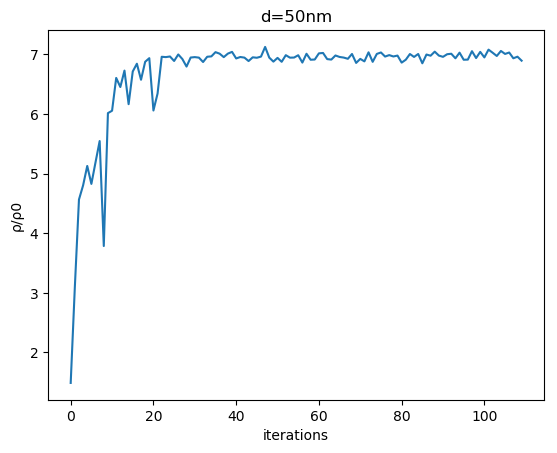

PyObject Text(0.5, 1.0, 'd=50nm')

In [2]:
using PyPlot
Data = [1.48862 17 0.05 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -0.000495205 1.69785 0.00119814 -0.00141757 0.00165691 -0.000353349 -0.0018874 0.000843342 -0.000702072 -0.210072 0.0005806 0.162097 0.000527431 -0.00108397 0.000501875 -0.00217578 
3.09383 17 0.05 0 2 0.00476972 -0.00563834 0 0 0 0 0 -0.15131 0.000579927 0.124304 0.000526876 -0.00108163 0.000501372 -0.00216636 -0.0272412 9.68374 0.065049 -0.0680193 0.0352935 -0.00723523 0.0188059 0.0226127 0.0117301 5.61136 0.136947 -4.02961 -0.141103 0.0650069 0.0170104 -0.230559 
4.56397 17 0.05 0 2 0.858889 -0.875062 0 0 0 0 0 0.723809 0.436431 -0.730085 -0.440442 0.308654 0.129538 -0.525663 -0.690033 -2.9305 -0.439496 3.66333 -0.113536 0.495819 -0.87689 1.16172 -0.333039 -1.94309 0.527678 0.986337 3.99848 2.06181 -1.51747 -0.874884 
4.80219 17 0.05 0 0.664892 0.128647 0.517578 0 0 0 0 0 0.223603 0.717501 -0.345326 0.173548 0.818708 -0.328981 -0.889989 0.00109816 -3.49332 -0.483227 3.73523 0.0375295 -0.118164 -0.0215519 -0.0577313 0.0214246 -2.46049 -3.33799 -0.755242 -4.24273 -2.63118 -1.06126 -4.42481 
5.12689 17 0.05 0 -0.193822 -0.143587 1.39923 0 0 0 0 0 -0.0330078 0.412884 -0.457639 -0.170728 0.551826 -0.475033 -1 0.213388 -0.437952 0.528151 0.577526 0.0899416 -0.144628 0.0600063 -0.00548319 -0.0686195 0.737246 4.02 -1.04707 0.0297555 0.630693 -1.00032 -0.918835 
4.82566 17 0.05 0 -0.280091 -0.0412857 1.51009 0 0 0 0 0 0.00378187 0.567435 -0.508386 -0.169133 0.583625 -0.523724 -1 0.262975 3.43183 -2.92748 1.53545 -0.097845 -0.0135095 0.0829361 0.00478615 0.108063 1.83988 2.27912 1.88623 -2.1629 -0.251046 -3.19487 -0.930261 
5.18797 17 0.05 0 -0.220812 -0.111215 1.43452 0 0 0 0 0 -0.0216006 0.469522 -0.473688 -0.170258 0.561616 -0.490387 -1 -0.0507477 2.48936 -0.732605 -0.423496 -0.0768529 -0.102749 -0.123233 0.0156665 0.0315802 0.46299 0.246717 2.57218 -4.79009 -3.84491 -2.50485 -0.557766 
5.54442 17 0.05 0 -0.14209 -0.135709 1.42021 0 0 0 0 0 -0.0176653 0.471627 -0.452572 -0.208237 0.530683 -0.510972 -1 0.0308364 0.780165 2.07628 4.06896 0.096731 0.0668432 -0.132286 -0.0205703 -0.124796 1.52073 6.0128 -2.9852 -2.70395 1.07088 -1.74159 -2.92653 
3.78416 17 0.05 0 -0.0310456 0.103831 1.79011 0 0 0 0 0 0.0366502 0.833488 -0.54651 -0.295273 0.57065 -0.571907 -1 -0.121929 0.872191 1.60451 0.0828282 -0.0400166 0.152307 -0.216583 -0.276809 -0.145635 0.0590686 0.554264 -0.133304 -1.9844 1.56944 -1.24662 0.737823 
6.01271 17 0.05 0 -0.111958 -0.0606871 1.5544 0 0 0 0 0 -0.00296596 0.610876 -0.480338 -0.233568 0.541162 -0.527706 -1 0.102694 2.79098 -7.10703 -1.66508 0.0609722 0.0968541 -0.0804532 -0.0801864 -0.128823 0.584084 0.91714 4.6821 0.44688 -2.57027 -3.55621 -1.05239 
6.05277 17 0.05 0 -0.0521735 -0.196204 1.51751 0 0 0 0 0 0.000414272 0.626225 -0.454928 -0.230976 0.526754 -0.547338 -1 -0.0635701 0.63776 5.87439 2.28315 0.0259564 -0.0399836 0.0438798 -0.0175419 0.0498118 2.86767 6.95717 -4.71851 -0.545225 5.63551 0.398511 0.185308 
6.60281 17 0.05 0 -0.0457725 -0.141279 1.5399 0 0 0 0 0 0.00752909 0.673961 -0.466485 -0.232352 0.540471 -0.546332 -0.998624 -0.344951 -0.250359 0.225792 -1.02685 -0.0835599 -0.119627 -0.0816991 -0.20487 -0.0270775 0.969814 2.56138 -0.939117 2.06879 0.237034 1.04343 -0.0373642 
6.45055 17 0.05 0 -0.0578929 -0.109577 1.41205 0 0 0 0 0 0.0401958 0.87662 -0.498193 -0.168026 0.548941 -0.511384 -0.999982 0.61395 -0.696235 -0.691027 -8.94933 0.310558 0.611674 -0.0569452 0.180264 -0.284642 -1.86142 -7.0849 2.21878 -1.2044 -9.03065 4.03613 3.77749 
6.72612 17 0.05 0 -0.0499772 -0.130187 1.49167 0 0 0 0 0 0.019264 0.757133 -0.477859 -0.208072 0.5434 -0.533732 -0.999089 0.60253 -0.852449 -0.10627 -5.27709 0.238351 0.0105315 0.27211 0.282629 -0.25749 -0.740155 -3.18143 1.42533 1.38506 -4.23123 2.73249 1.81978 
6.16281 17 0.05 0 -0.05967 -0.133794 1.34235 0 0 0 0 0 0.0130497 0.685219 -0.466052 -0.196589 0.510142 -0.511655 -0.984129 -0.0728486 1.64059 10.7338 -3.27822 -0.0433582 0.0824151 -0.217101 -0.0536297 0.0710833 0.536944 -2.06667 -2.4217 -5.16449 -0.526982 2.22418 3.44705 
6.71115 17 0.05 0 -0.0528146 -0.131231 1.44273 0 0 0 0 0 0.0174513 0.734843 -0.474382 -0.204692 0.533243 -0.527117 -0.99466 -0.311232 -0.907268 -3.54295 5.31191 0.0319716 -0.0246879 -0.0874362 -0.159037 -0.177588 1.21977 5.58485 -2.14408 2.50166 4.59808 -1.89638 -4.45923 
6.84111 17 0.05 0 -0.0511965 -0.130635 1.47 0 0 0 0 0 0.0184856 0.747416 -0.476362 -0.206617 0.53899 -0.530873 -0.99718 -0.297643 -1.02525 -1.90196 -1.18221 -0.122798 -0.163104 -0.0834985 -0.254153 -0.0158383 0.197026 0.569232 -0.0511628 2.32323 -0.548395 1.04043 -0.440319 
6.57221 17 0.05 0 -0.0582529 -0.167485 1.44656 0 0 0 0 0 0.0214571 0.772075 -0.477137 -0.19509 0.536186 -0.525598 -1 0.532481 -0.506899 7.09184 -2.1934 -0.214551 -0.241959 0.736584 0.350634 0.226355 0.571003 -2.00748 -2.77167 -0.973626 0.666834 3.50013 1.70309 
6.87347 17 0.05 0 -0.0523385 -0.136815 1.46615 0 0 0 0 0 0.0189606 0.751433 -0.476486 -0.204722 0.53854 -0.530022 -0.99824 -0.0424217 -0.752171 -0.364384 -1.43432 0.0531949 0.164259 -0.144981 0.0550963 0.173443 0.194912 0.313911 -0.247588 1.88165 -0.343225 1.28437 -0.0883165 
6.93426 17 0.05 0 -0.0640993 -0.142597 1.40414 0 0 0 0 0 0.025658 0.782532 -0.484968 -0.183777 0.534528 -0.515457 -0.999281 -0.0386069 -0.361377 -0.395543 4.46903 -0.0169166 0.203302 0.00865683 -0.0883215 -0.0593627 1.28233 4.64996 -2.64456 1.62895 4.22681 -0.668758 -3.351 
6.05689 17 0.05 0 -0.068077 -0.146947 1.52599 0 0 0 0 0 0.0549572 1 -0.542532 -0.170955 0.566029 -0.520835 -1 -0.0453898 -1.65533 -4.63444 -8.59286 0.162628 0.313812 -0.262721 -0.126663 -0.152139 -1.33511 -4.61501 2.3357 1.25589 -9.86232 4.04459 2.66139 
6.34119 17 0.05 0 -0.0651084 -0.143701 1.43911 0 0 0 0 0 0.0333105 0.859132 -0.500542 -0.180458 0.543013 -0.516827 -1 0.046666 -0.722642 2.26365 -7.32125 0.0289218 0.142508 0.115971 0.240041 0.175074 -1.33237 -6.27711 1.06202 -1.28733 -6.21214 3.91949 3.05294 
6.9576 17 0.05 0 -0.0643211 -0.14284 1.41212 0 0 0 0 0 0.0273536 0.800342 -0.488454 -0.183043 0.536425 -0.515758 -1 0.00820068 -0.605337 1.37124 -0.391918 -0.0947303 0.114403 0.0579386 -0.0300292 0.210105 0.325452 -0.172405 -1.26107 0.446535 0.268963 1.3106 -0.406822 
6.95209 17 0.05 0 -0.0645204 -0.142389 1.41174 0 0 0 0 0 0.027585 0.799982 -0.48935 -0.182935 0.53649 -0.515442 -1 -0.0456556 -0.375627 1.38345 -0.0233803 0.0459181 0.0397486 0.0868496 0.135702 -0.00973033 0.453952 0.178173 -1.70511 0.160062 0.405254 1.26594 -0.346572 
6.96243 17 0.05 0 -0.0643504 -0.142774 1.41206 0 0 0 0 0 0.0273876 0.800289 -0.488586 -0.183027 0.536435 -0.515712 -1 0.114297 -0.309526 1.45202 -0.592065 0.0684257 0.347725 -0.077579 0.0799138 -0.0916487 0.334815 -0.0710796 -1.16308 -0.0118434 -0.0534715 1.21574 -0.274534 
6.88691 17 0.05 0 -0.064566 -0.141764 1.41085 0 0 0 0 0 0.027891 0.799975 -0.490332 -0.183033 0.536407 -0.51509 -1 0.407937 -0.33416 1.11684 0.112834 -0.084603 0.0208078 -0.0166356 0.272001 0.262614 0.325063 0.289181 -1.37042 0.390049 0.712651 1.44245 -0.640631 
6.99655 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.133961 0.127631 0.79679 -0.64439 -0.0415297 -0.2506 0.198002 0.212943 -0.205519 0.265567 0.355212 -0.765147 -0.0837946 -0.474737 0.622218 -0.411692 
6.9192 17 0.05 0 -0.0642439 -0.142401 1.41005 0 0 0 0 0 0.028013 0.801026 -0.490416 -0.183049 0.536082 -0.515191 -1 -0.330935 -0.314859 1.35302 0.148666 -0.0673563 -0.347633 0.207625 0.236039 0.158953 0.320871 0.626423 -1.44777 0.260354 0.692317 1.22741 -0.672673 
6.79342 17 0.05 0 -0.0643592 -0.142645 1.41175 0 0 0 0 0 0.0274955 0.800334 -0.488927 -0.18303 0.536397 -0.515604 -1 -0.433476 -0.090379 1.58419 0.361891 -0.326247 -0.45435 0.140294 -0.253427 0.0836712 0.635344 0.707441 -1.54449 0.0167706 0.896043 0.981594 -0.65522 
6.94496 17 0.05 0 -0.0643707 -0.14267 1.41192 0 0 0 0 0 0.0274438 0.800265 -0.488778 -0.183028 0.536428 -0.515645 -1 -0.409283 -0.184532 1.71388 -0.131196 0.1708 0.359864 -0.610478 -0.511115 -0.247264 0.480598 0.307449 -1.32821 0.194876 0.274488 1.22764 -0.313728 
6.95188 17 0.05 0 -0.0643718 -0.142672 1.41194 0 0 0 0 0 0.0274386 0.800258 -0.488763 -0.183028 0.536431 -0.515649 -1 -0.154147 -0.469907 0.965822 -0.577316 -0.197493 -0.476211 0.227771 0.0319606 0.0620708 0.320542 -0.101427 -1.17524 0.032829 -0.252443 1.36471 -0.411641 
6.94315 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.0274381 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.505361 -0.26868 2.02539 -0.0905379 -0.115016 -0.266529 0.402818 0.347374 0.0720021 0.474351 0.365782 -1.42097 0.329026 0.538926 1.16326 -0.374905 
6.86971 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.389918 0.0357169 2.14846 0.0495291 -0.30527 -0.247479 0.113714 -0.0680952 0.0429612 0.721734 0.667251 -1.34506 -0.263702 0.705105 0.760633 -0.269121 
6.95805 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.0899763 -0.14723 1.64043 -0.298625 -0.108738 -0.0125536 -0.106436 -0.0889051 0.0460926 0.56042 0.384715 -1.43438 0.034835 0.315666 1.19695 -0.42332 
6.96407 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.856714 -0.165053 2.28263 0.0770392 0.109718 -0.0454031 0.633003 0.547768 -0.00474431 0.479765 0.407796 -1.46872 -0.13262 0.807291 1.19494 -0.195368 
7.03519 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.357899 0.0791324 2.20502 0.0180679 -0.104388 -0.148362 -0.279319 -0.255974 0.0778891 0.616889 0.722608 -1.35958 -0.347898 0.880404 0.773313 -0.417575 
7.00957 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.351297 -0.558567 1.88658 -0.160698 -0.140439 -0.039482 0.0709909 -0.132711 0.0135705 0.432457 -0.0924336 -1.9658 0.271321 0.619043 1.64286 -0.283972 
6.95165 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.64832 -0.631534 1.695 -0.206977 -0.00855205 -0.135054 0.558581 0.258987 0.0906062 0.305647 -0.00511977 -1.51389 0.644094 0.553236 1.48962 -0.558442 
7.01081 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.354959 -0.109818 2.14521 -0.112941 -0.0962267 -0.161312 0.0761217 -0.0792817 0.152801 0.611714 0.305512 -1.32326 -0.161648 0.651871 1.18768 -0.366319 
7.03985 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.368838 0.718623 2.2077 0.166116 0.0497512 -0.149854 0.198394 0.0915461 0.0789657 0.866937 1.04249 -1.13418 -1.00707 0.653332 0.187644 -0.0871692 
6.9295 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.330707 -0.189021 0.965949 -0.249321 -0.0553263 -0.164297 0.0826029 -0.152738 -0.0527376 0.555135 0.17883 -1.11765 -0.0386477 0.109113 1.04641 -0.394386 
6.9539 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.250949 -0.0915482 1.16009 -0.50387 -0.0167143 0.0484465 -0.0563352 0.0232327 -0.0549178 0.161548 -0.00285593 -0.919284 0.104125 -0.0012959 1.24485 -0.175324 
6.9432 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.362803 -0.27361 1.30602 -0.365498 0.0601089 0.081607 -0.146386 -0.138376 -0.148086 0.443565 0.198443 -1.15693 -0.0758505 0.137679 1.1557 -0.243918 
6.88593 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0253709 -0.0514767 1.45163 -0.260823 -0.113565 -0.204072 -0.0338866 0.0413015 0.0641237 0.256801 0.235219 -1.13801 -0.0269787 0.322434 0.677637 -0.248552 
6.94859 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.591136 -0.230803 2.17589 0.0210921 0.0669087 0.168442 -0.204118 0.0345337 -0.259956 0.413055 0.373169 -1.47155 0.124692 0.739869 1.5805 -0.207024 
6.94113 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.710267 -0.30892 1.39709 -0.127998 -0.032717 -0.441644 0.475325 0.485641 0.00535365 0.40352 0.163616 -1.29731 0.2214 0.358172 1.34975 -0.365431 
6.96033 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.4619 -0.0838034 2.08398 -0.0782142 0.335779 0.83475 -0.358393 0.118623 -0.254034 0.492813 0.458381 -1.52735 -0.344876 0.599172 1.05919 -0.103152 
7.12281 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0230858 -0.340809 2.21689 0.0388112 0.123203 -0.0718776 -0.100624 0.0985881 0.189145 0.579609 0.245721 -1.80893 0.0584785 1.05895 1.41893 -0.479143 
6.94344 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0330172 0.00400401 1.44808 -0.223296 -0.0975466 -0.265497 0.00909148 0.0294546 0.149764 0.464302 0.411113 -1.27142 -0.218981 0.300346 0.834012 -0.343758 
6.87645 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.263713 0.18611 2.6069 0.352877 -0.0202015 -0.0995379 0.250628 0.0264097 0.049105 0.623484 0.887632 -1.43945 -0.347422 1.3025 0.80488 -0.286882 
6.93886 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.265467 -0.310693 1.39535 -0.484976 -0.000240261 0.0635375 0.0714621 0.104681 0.0290477 0.400216 0.00366824 -1.20384 0.216797 -0.000482297 1.19187 -0.177348 
6.87318 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.473431 -0.326462 2.59775 0.196395 0.0590614 0.0663817 -0.0258845 -0.160942 -0.0535167 0.731555 0.450494 -2.01787 -0.111736 0.971845 1.44936 -0.2095 
6.98447 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.623321 -0.294187 1.0675 -0.605858 0.278332 0.502078 0.055956 0.0625662 -0.418942 0.298511 0.0719861 -1.05875 0.235813 -0.28659 1.08881 -0.168571 
6.94279 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.443464 -0.00556108 1.49007 -0.0215543 0.0865895 0.353196 -0.293622 -0.177994 -0.174773 0.402263 0.610064 -1.43459 -0.460187 0.386169 0.984707 -0.318641 
6.94472 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.0534854 -0.245782 1.306 -0.234183 0.0788468 0.169919 -0.0395663 0.0726145 -0.0417207 0.465738 0.256262 -1.10269 0.198251 0.159632 1.04227 -0.494523 
6.98341 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.449029 0.137543 1.74521 -0.258792 0.0134427 -0.389608 0.294266 0.411844 0.128722 0.548992 0.460584 -1.28491 -0.379614 0.356514 0.895505 -0.201436 
6.86019 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.685247 0.159386 2.52728 0.548221 -0.0260035 0.0921272 0.478813 0.335634 0.113496 0.738884 1.13137 -1.65899 -0.552089 1.29278 0.777806 -0.435458 
7.00798 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.737902 0.485002 1.72181 -0.116416 0.0565797 -0.143887 0.344353 0.307342 0.0608627 0.55808 0.78051 -1.04803 -0.595156 0.25892 0.535951 -0.111772 
6.90791 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.310354 -0.330935 1.4842 -0.12809 -0.153548 -0.114241 0.206426 -0.0434134 0.0266178 0.510466 0.357719 -1.52809 0.0793683 0.4956 1.12245 -0.474278 
6.91164 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.470898 -0.477194 1.71072 -0.0818601 0.221788 0.692306 -0.541701 -0.27597 -0.167165 0.320598 0.254165 -1.56347 0.313201 0.497455 1.2927 -0.455361 
7.01507 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 1.26896 -0.148972 1.54934 -0.348946 -0.0872456 -0.417414 0.813912 0.435761 0.0862311 0.264891 -0.0778778 -1.4345 0.0212496 0.188699 1.292 -0.149871 
7.02137 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.00273533 -0.320753 1.51264 -0.215449 0.142103 -0.00226673 -0.234938 0.215494 -0.00186015 0.465026 0.0777307 -1.44572 0.306165 0.465969 1.42567 -0.263729 
6.91868 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.589645 -0.149811 1.40994 -0.0106266 -0.335265 -0.422283 0.497238 0.150504 0.187046 0.589693 0.456571 -1.14158 0.0200287 0.485703 0.947845 -0.437883 
6.91041 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.373438 -0.0899977 1.42788 -0.141168 -0.365935 -0.247356 0.230967 0.100995 0.0138513 0.566464 0.4603 -1.37859 -0.283342 0.206031 1.00176 -0.287746 
6.97935 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.339913 -0.0623495 1.04592 -0.295387 -0.0735449 0.0311772 0.226103 0.117672 0.0192808 0.39233 0.196058 -1.03487 -0.23829 0.0378798 0.968081 -0.0932427 
6.95444 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.753258 -0.124164 1.56901 -0.223039 0.076599 0.0239441 0.288806 0.280442 -0.18477 0.335441 0.234939 -1.35551 -0.0152743 0.259596 1.08078 -0.361942 
6.94408 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.232879 -0.192827 1.63836 -0.240499 0.114419 0.0737122 -0.0458958 0.185214 -0.0375459 0.491172 0.252922 -1.48523 -0.0757803 0.146807 1.02537 -0.202378 
6.92379 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.94495 0.215831 1.74789 -0.145601 0.284523 0.684099 0.107099 0.0540948 -0.237994 0.598827 0.660772 -0.919338 -0.640804 0.257919 0.871008 -0.0934284 
7.00448 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.595205 -0.0785621 1.4039 -0.0267805 -0.014536 -0.0467578 -0.395396 -0.292027 -0.0489251 0.49202 0.564635 -1.36943 -0.0268295 0.365661 0.936573 -0.388959 
6.85463 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.0300365 -0.175808 2.27154 0.331122 0.0276592 -0.249903 0.356204 0.267758 0.0635292 0.574473 0.744704 -1.54492 -0.199832 0.993076 1.0122 -0.443734 
6.92226 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0849158 -0.267493 2.31388 0.0609983 -0.151987 -0.338117 0.458674 0.233805 -0.0091129 0.565165 0.1605 -1.70555 0.00885569 1.07234 1.32395 -0.462232 
6.88031 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0459125 -0.225839 1.79027 0.145031 -0.112858 -0.32292 -0.136608 0.0615747 0.147405 0.540328 0.563686 -1.52014 0.00878494 0.608331 1.15875 -0.340672 
7.03223 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.319859 -0.16807 2.03121 -0.263957 -0.137253 -0.309608 -0.0906731 0.0324603 0.221843 0.515875 0.151377 -1.62887 -0.012885 0.562602 1.34158 -0.331693 
6.87273 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.162463 -0.191387 1.32619 -0.325131 0.0137831 -0.31211 0.220969 0.228351 0.0737231 0.489433 0.209216 -1.11822 -0.0971684 0.148941 1.18816 -0.453403 
7.00542 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.119639 -0.278558 2.64267 0.0591522 0.0685267 0.211264 0.122129 0.0311337 -0.00632999 0.57378 0.472933 -1.83383 -0.110411 1.07042 1.57946 -0.411028 
7.02979 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.0340286 -0.242572 2.36 0.0224454 -0.0828396 -0.0587361 0.0576328 0.0782272 0.0110784 0.545781 0.458445 -1.80262 0.0457867 0.898194 1.24272 -0.337766 
6.9611 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.0143518 0.114666 1.56467 -0.229547 -0.226864 -0.349334 0.116327 0.101316 0.139484 0.340723 0.406335 -1.23044 0.0732662 0.321697 1.17327 -0.129663 
6.98557 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.279985 0.0771934 1.29869 -0.301938 -0.0536461 -0.195271 -0.193073 -0.061639 0.00196243 0.334883 0.452832 -1.0062 -0.0175474 -0.0561059 0.774961 -0.333505 
6.96261 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.527962 -0.376399 1.44314 -0.433085 -0.133888 -0.457723 0.400189 0.320918 0.34443 0.46414 -0.0148527 -1.43788 0.240282 0.0956581 1.28189 -0.333776 
6.97771 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.703206 -0.186126 1.59896 -0.177466 0.0255645 0.313078 -0.0922881 0.0703609 -0.0251258 0.433917 0.311662 -1.19517 0.155415 0.288941 1.06197 -0.372695 
6.8596 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.45145 -0.0780312 2.58428 0.200176 -0.11062 -0.29379 0.395543 0.229176 0.211913 0.715181 0.49754 -1.8417 -0.376534 1.10056 1.34553 -0.374372 
6.90805 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.0690827 -0.731953 2.31742 0.332181 0.0583754 -0.170012 0.289716 0.115064 0.0380601 0.463155 0.0320448 -2.12479 0.786023 1.21723 1.62018 -0.499979 
7.00381 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.455219 -0.212216 1.29576 -0.3238 0.204323 0.243542 -0.323372 0.212856 -0.0564115 0.497731 0.20346 -1.12639 0.0478313 -0.0471646 1.07732 -0.190715 
6.9549 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.204277 -0.175517 1.51153 -0.126914 0.0862665 0.53624 -0.163583 -0.0431478 -0.268488 0.500621 0.390382 -1.29685 -0.269434 0.412929 1.02807 -0.306738 
7.00428 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.152561 -0.149167 1.31113 -0.388201 -0.0347206 -0.0267575 0.00737223 -0.0663983 0.0234501 0.527415 0.179678 -1.21078 0.0480305 0.0799476 1.20689 -0.390928 
6.84831 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 1.00804 -0.230735 2.38687 -0.123793 -0.149129 -0.399383 0.487557 0.633242 0.208332 0.727613 0.0166176 -1.48097 -0.162064 0.586834 1.41166 -0.161692 
6.99528 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.245925 -0.171201 1.5232 -0.414149 0.130944 0.0196652 0.106488 0.0756588 -0.182088 0.484241 0.10719 -1.30132 -0.0387233 0.113408 1.40518 -0.0791506 
6.97553 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.22187 0.361882 1.35806 -0.326347 0.08031 0.1394 -0.0804552 -0.0212258 0.0264688 0.61538 0.666583 -0.680004 -0.344005 -0.0296995 0.364062 -0.170265 
7.04347 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.212695 0.0643734 2.46198 0.0997532 -0.0203734 -0.176444 -0.226508 -0.0515764 -0.0177577 0.647154 0.767977 -1.68382 -0.469369 0.900163 0.802517 -0.259916 
6.97757 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.153692 -0.472192 1.2804 -0.523302 -0.0573865 -0.0793892 -0.246683 0.00159286 0.100575 0.295296 -0.160273 -1.3113 0.344168 0.265777 1.78705 -0.296925 
6.95643 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.4488 0.183827 1.19283 -0.0680225 0.0602967 -0.135159 0.0991847 0.0707694 0.0555741 0.55778 0.815922 -0.980518 -0.213784 0.169896 0.780609 -0.377396 
7.00035 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.609803 -0.32633 2.17491 0.0146368 -0.160945 -0.0316028 -0.428449 -0.327231 0.0855377 0.584923 0.395677 -1.58313 0.0488347 0.608123 1.1909 -0.237129 
7.00847 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.14337 -0.554782 1.0936 -0.458619 0.216244 0.258006 -0.180114 -0.0155376 -0.164269 0.426458 -0.126101 -1.1596 0.357342 0.121119 1.75946 -0.53215 
6.93192 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.296539 0.403652 1.21419 -0.158935 -0.104362 -0.446667 0.556647 0.213119 0.155958 0.439007 0.80322 -0.77003 -0.577173 -0.0166928 0.545582 -0.21614 
7.02667 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.435902 -0.586745 1.43934 0.254041 -0.278721 -0.261046 0.0563946 -0.123173 0.264455 0.498532 0.305581 -1.66837 0.0988118 0.797782 1.35612 -0.640057 
6.90782 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.223407 -0.249435 0.963393 -0.684764 -0.000787539 -0.018099 -0.0734515 -0.0574676 0.0256517 0.184103 0.0384495 -0.893757 0.106159 -0.279658 1.10488 -0.273065 
6.91003 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -1.32942 0.135254 1.65216 -0.0587109 -0.0728515 -0.0283387 -0.393678 -0.464747 0.0266989 0.674092 0.691698 -1.14207 -0.410685 0.297927 0.623076 -0.250095 
7.05138 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.696207 0.334654 1.05184 -0.401697 -0.104212 -0.033907 -0.249892 -0.236007 0.156102 0.441982 0.592587 -0.70314 -0.421761 -0.224345 0.515347 -0.143645 
6.93609 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.357277 -0.273621 1.88575 0.0867781 -0.129472 -0.141003 0.306798 -0.0647486 0.0891132 0.446444 0.45523 -1.70047 -0.0288 0.693149 1.15316 -0.308993 
7.03963 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.116853 -0.0215352 1.16348 -0.498246 0.0362808 0.265398 -0.195573 -0.118912 -0.00847027 0.403748 0.298594 -0.81761 -0.171474 -0.287931 0.837217 -0.285903 
6.94694 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.760554 -0.175217 1.652 -0.343002 -0.00649817 -0.219148 0.48137 0.385101 0.0195477 0.364614 0.0395107 -1.35176 0.0428865 0.287675 1.10866 -0.352162 
7.07733 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.211286 -0.302959 2.07452 0.0769283 -0.030514 0.137837 0.164243 0.164025 -0.0442562 0.625219 0.450369 -1.66205 0.0576836 0.912761 1.22421 -0.392287 
7.02544 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.217185 -0.174668 2.18086 -0.3077 0.0178385 0.337068 -0.365636 -0.393063 -0.0223291 0.331093 0.0644222 -1.54087 -0.117366 0.467346 1.06813 -0.0726231 
6.97106 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.651425 -0.417509 2.43213 0.0771943 -0.0805286 -0.169151 0.251215 0.201442 0.0892388 0.532576 0.371055 -1.8555 0.196767 1.11367 1.35396 -0.459195 
7.05505 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.833643 -0.491414 2.19856 0.053224 -0.0699615 0.217682 -0.219291 -0.150675 0.0444008 0.543508 0.207261 -1.91209 0.508093 0.966402 1.46255 -0.671989 
7.00543 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.355219 -0.444759 1.24445 -0.25948 0.205188 0.480973 0.0970911 0.133416 -0.00459074 0.489341 0.120846 -1.20115 0.313232 0.213938 1.54361 -0.381202 
7.02892 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.414421 -0.0778452 1.35499 -0.357446 0.12755 0.338184 -0.182752 -0.115336 -0.134332 0.42308 0.392256 -1.04132 -0.0268208 0.199678 0.888187 -0.365842 
6.93239 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.792176 -0.361816 1.34935 -0.389682 -0.041304 0.0297399 0.224674 0.263851 0.172296 0.343214 -0.0136886 -1.4023 0.272929 0.271343 1.2894 -0.481933 
6.959 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 -0.16813 -0.728923 1.19876 -0.438159 -0.0419314 0.113998 -0.298312 -0.184708 0.0566134 0.458335 -0.323432 -1.50618 0.71442 -0.0400854 1.46053 -0.351238 
6.8921 17 0.05 0 -0.064372 -0.142672 1.41194 0 0 0 0 0 0.027438 0.800257 -0.488761 -0.183028 0.536432 -0.51565 -1 0.315607 -0.302107 1.94145 0.00417293 -0.0470602 -0.0579335 0.211635 0.13513 0.0597369 0.621151 0.45829 -1.46978 0.0885086 0.586614 1.05477 -0.246213 
]
ρ20 = Data[:,1]
plot(ρ20)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=50nm")

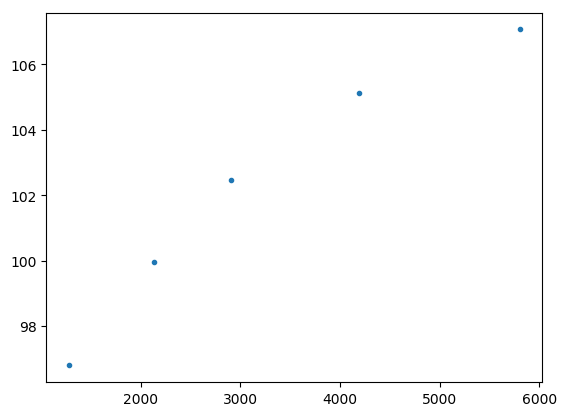

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16cb1d780>

In [9]:
resolution=[2906 1276 2136 4194 5804]
rho=[102.48 96.7989 99.9697 105.139 107.066]
plot(resolution[:],rho[:],".")

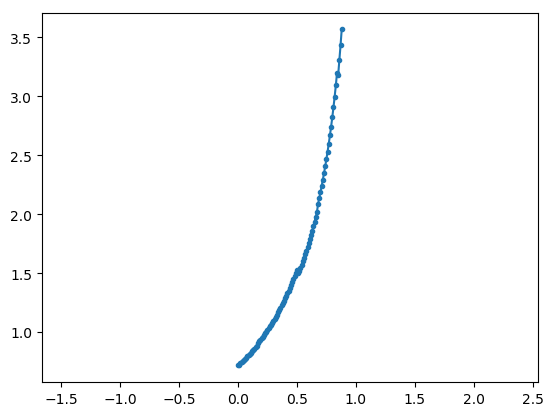

(-0.044000000000000004, 0.924, 0.57453785, 3.70995915)

In [2]:
using PyPlot
Data = [0.717057 17 0.05 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 -0.00148356 0.00583704 -0.00392138 0.00472127 0.0244995 -0.00944563 -0.00370846 0.00591394 0.00283019 1.72526 -0.0235682 -0.00990065 -0.000676774 0.00527237 0.00902748 0.0320739 
0.724742 17 0.05 0 1.95981e-05 -1.31662e-05 1.58518e-05 0 0 0 0 0 1.00579 -7.91313e-05 -3.32418e-05 -2.2723e-06 1.77022e-05 3.03101e-05 0.000107689 0.000784604 0.0065181 -0.00432305 0.0068062 0.0286629 -0.0104658 -0.00532521 0.00572981 0.000131754 1.7482 -0.023648 -0.0117999 -0.000137946 0.00355582 0.00464165 0.018489 
0.734108 17 0.05 0 3.91962e-05 -2.63324e-05 3.17037e-05 0 0 0 0 0 1.01159 -0.000158263 -6.64837e-05 -4.54459e-06 3.54044e-05 6.06202e-05 0.000215379 0.000530195 0.00638787 -0.004516 0.00751019 0.0295152 -0.0108448 -0.00515559 0.00570235 0.000371237 1.77732 -0.024546 -0.0122094 -0.000176632 0.00373958 0.00478202 0.019897 
0.74363 17 0.05 0 5.87943e-05 -3.94986e-05 4.75555e-05 0 0 0 0 0 1.01738 -0.000237394 -9.97255e-05 -6.81689e-06 5.31066e-05 9.09304e-05 0.000323068 0.000265386 0.00622931 -0.00471666 0.0082441 0.0303896 -0.0112343 -0.00497368 0.00566844 0.000628631 1.80712 -0.0254659 -0.0126332 -0.000207379 0.00394173 0.00492286 0.0213647 
0.753312 17 0.05 0 7.83924e-05 -5.26647e-05 6.34074e-05 0 0 0 0 0 1.02317 -0.000316525 -0.000132967 -9.08919e-06 7.08088e-05 0.00012124 0.000430758 -1.38193e-05 0.00605332 -0.00492582 0.0090088 0.0312957 -0.0116357 -0.00477481 0.00562528 0.000899028 1.83763 -0.0264122 -0.0130727 -0.000229938 0.00416319 0.00506261 0.0228748 
0.763158 17 0.05 0 9.79905e-05 -6.58309e-05 7.92592e-05 0 0 0 0 0 1.02896 -0.000395657 -0.000166209 -1.13615e-05 8.8511e-05 0.000151551 0.000538447 -0.000309144 0.00584506 -0.00514249 0.0098126 0.0322288 -0.0120483 -0.00455914 0.00557203 0.00119178 1.86888 -0.0273857 -0.0135298 -0.000247363 0.00440485 0.00520164 0.0244455 
0.773172 17 0.05 0 0.000117589 -7.89971e-05 9.5111e-05 0 0 0 0 0 1.03476 -0.000474788 -0.000199451 -1.36338e-05 0.000106213 0.000181861 0.000646136 -0.000616539 0.00559824 -0.00536687 0.0106588 0.0331978 -0.0124752 -0.00432915 0.00551017 0.00149666 1.90088 -0.0283914 -0.014001 -0.000259082 0.00466563 0.00534082 0.0260657 
0.783356 17 0.05 0 0.000137187 -9.21633e-05 0.000110963 0 0 0 0 0 1.04055 -0.000553919 -0.000232693 -1.59061e-05 0.000123915 0.000212171 0.000753826 -0.000936963 0.00532239 -0.00559775 0.0115456 0.0341993 -0.0129118 -0.00408274 0.00543847 0.00182755 1.93366 -0.0294202 -0.0144929 -0.000268138 0.0049522 0.00547726 0.0277474 
0.793718 17 0.05 0 0.000156785 -0.000105329 0.000126815 0 0 0 0 0 1.04634 -0.000633051 -0.000265935 -1.81784e-05 0.000141618 0.000242481 0.000861515 -0.00127065 0.00500696 -0.00583473 0.0124828 0.0352217 -0.0133613 -0.00382104 0.00536132 0.00217281 1.96726 -0.0304872 -0.0150032 -0.000273923 0.00526256 0.00561555 0.0294807 
0.804259 17 0.05 0 0.000176383 -0.000118496 0.000142667 0 0 0 0 0 1.05213 -0.000712182 -0.000299177 -2.04507e-05 0.00015932 0.000272791 0.000969205 -0.00163469 0.00464636 -0.00608777 0.0134563 0.0363083 -0.0138248 -0.00353362 0.0052609 0.00254153 2.0017 -0.0315722 -0.0155305 -0.000265961 0.00560082 0.005752 0.0312923 
0.814985 17 0.05 0 0.000195981 -0.000131662 0.000158518 0 0 0 0 0 1.05793 -0.000791313 -0.000332418 -2.2723e-05 0.000177022 0.000303101 0.00107689 -0.00200611 0.00424271 -0.00634181 0.0144944 0.0374171 -0.0143036 -0.00323049 0.0051536 0.002931 2.037 -0.0327058 -0.016081 -0.000264263 0.00596699 0.00588704 0.0331561 
0.825902 17 0.05 0 0.000215579 -0.000144828 0.00017437 0 0 0 0 0 1.06372 -0.000870444 -0.00036566 -2.49953e-05 0.000194724 0.000333411 0.00118458 -0.00239376 0.00378882 -0.00660592 0.0155786 0.0385662 -0.0147931 -0.0029092 0.00503545 0.00334803 2.07322 -0.0338651 -0.0166541 -0.000256686 0.00636643 0.00602192 0.035092 
0.837012 17 0.05 0 0.000235177 -0.000157994 0.000190222 0 0 0 0 0 1.06951 -0.000949576 -0.000398902 -2.72676e-05 0.000212426 0.000363721 0.00129227 -0.0028167 0.0032833 -0.00687794 0.0167138 0.0397541 -0.0152984 -0.00255281 0.00490271 0.00379028 2.11037 -0.0350636 -0.0172515 -0.000244328 0.00680186 0.0061572 0.0370789 
0.848323 17 0.05 0 0.000254775 -0.00017116 0.000206074 0 0 0 0 0 1.0753 -0.00102871 -0.000432144 -2.95399e-05 0.000230129 0.000394032 0.00139996 -0.00324102 0.00273149 -0.00716161 0.0179186 0.0409949 -0.0158171 -0.00219396 0.00475723 0.00423813 2.1485 -0.0362978 -0.0178806 -0.000228194 0.00727825 0.00628892 0.0391635 
0.859838 17 0.05 0 0.000274373 -0.000184327 0.000221926 0 0 0 0 0 1.0811 -0.00110784 -0.000465386 -3.18122e-05 0.000247831 0.000424342 0.00150765 -0.00369647 0.00211611 -0.00745489 0.0191805 0.0422803 -0.0163495 -0.00180319 0.00459456 0.00472022 2.18762 -0.0375721 -0.0185366 -0.0002073 0.00779518 0.00641859 0.0413115 
0.871565 17 0.05 0 0.000293971 -0.000197493 0.000237778 0 0 0 0 0 1.08689 -0.00118697 -0.000498628 -3.40844e-05 0.000265533 0.000454652 0.00161534 -0.00417468 0.00143452 -0.00775443 0.0205114 0.0436144 -0.0168992 -0.00138861 0.00441976 0.00522915 2.2278 -0.038887 -0.0192234 -0.000183146 0.0083597 0.0065515 0.0435431 
0.883506 17 0.05 0 0.000313569 -0.000210659 0.000253629 0 0 0 0 0 1.09268 -0.0012661 -0.00053187 -3.63567e-05 0.000283235 0.000484962 0.00172303 -0.00467709 0.000684743 -0.00806563 0.0219131 0.0450006 -0.0174644 -0.000949203 0.00422796 0.00576188 2.26905 -0.0402424 -0.0199426 -0.000156212 0.00897518 0.00668028 0.0458547 
0.910319 17 0.05 0 0.000333168 -0.000223825 0.000269481 0 0 0 0 0 1.09847 -0.00134523 -0.000565111 -3.8629e-05 0.000300938 0.000515272 0.00183072 -0.0252449 0.0253919 -0.0134831 -0.00426589 -0.0640365 -0.0215561 0.0284311 -0.0184197 -0.00621275 2.38002 0.00105917 -0.00469649 0.0135144 0.0146137 -0.0138317 0.0276182 
0.920572 17 0.05 0 0.000352766 -0.000236991 0.000285333 0 0 0 0 0 1.10427 -0.00142436 -0.000598353 -4.09013e-05 0.00031864 0.000545582 0.00193841 -0.00833006 0.0224949 -0.0147029 -0.0068728 -0.0737815 -0.0205005 0.0102089 -0.0156543 -0.00696771 2.41579 0.00258374 -0.00816572 0.0165158 0.00788612 -0.0183098 0.039138 
0.933633 17 0.05 0 0.000372364 -0.000250158 0.000301185 0 0 0 0 0 1.11006 -0.0015035 -0.000631595 -4.31736e-05 0.000336342 0.000575892 0.0020461 -0.00793531 0.0235649 -0.0156061 -0.00722434 -0.0762076 -0.0209362 0.0100102 -0.0158727 -0.00692167 2.4627 0.00215697 -0.00820784 0.0176658 0.00830436 -0.0185664 0.0415327 
0.94695 17 0.05 0 0.000391962 -0.000263324 0.000317037 0 0 0 0 0 1.11585 -0.00158263 -0.000664837 -4.54459e-05 0.000354044 0.000606202 0.00215379 -0.00749418 0.0247195 -0.0165509 -0.00760438 -0.0787285 -0.0213733 0.00976799 -0.0160858 -0.00686131 2.51096 0.00170495 -0.00823157 0.0188717 0.00874099 -0.0188245 0.0440424 
0.960532 17 0.05 0 0.00041156 -0.00027649 0.000332889 0 0 0 0 0 1.12164 -0.00166176 -0.000698079 -4.77182e-05 0.000371746 0.000636513 0.00226148 -0.00700564 0.0259489 -0.0175384 -0.00800603 -0.081343 -0.0218056 0.00948397 -0.0162845 -0.00678226 2.56062 0.00122523 -0.0082294 0.0201353 0.00919075 -0.0190817 0.046679 
0.974383 17 0.05 0 0.000431158 -0.000289656 0.00034874 0 0 0 0 0 1.12744 -0.00174089 -0.000731321 -4.99905e-05 0.000389449 0.000666823 0.00236917 -0.00644042 0.0272669 -0.0185755 -0.00842042 -0.0840439 -0.0222386 0.0091245 -0.0164725 -0.00668348 2.61173 0.00072183 -0.00819386 0.0214685 0.00964357 -0.0193347 0.0494409 
0.988515 17 0.05 0 0.000450756 -0.000302822 0.000364592 0 0 0 0 0 1.13323 -0.00182002 -0.000764562 -5.22628e-05 0.000407151 0.000697133 0.00247686 -0.00583587 0.0286887 -0.0196612 -0.00887107 -0.0868439 -0.0226677 0.00873271 -0.0166497 -0.00657951 2.66436 0.000190845 -0.00813327 0.0228673 0.0101236 -0.0195847 0.0523355 
1.00294 17 0.05 0 0.000470354 -0.000315988 0.000380444 0 0 0 0 0 1.13902 -0.00189915 -0.000797804 -5.45351e-05 0.000424853 0.000727443 0.00258455 -0.00514416 0.0301907 -0.0208017 -0.00932213 -0.0897302 -0.0230936 0.00825686 -0.0168123 -0.00641746 2.71855 -0.000375736 -0.00801486 0.0243434 0.0105974 -0.0198298 0.0554057 
1.01765 17 0.05 0 0.000489952 -0.000329155 0.000396296 0 0 0 0 0 1.14482 -0.00197828 -0.000831046 -5.68074e-05 0.000442555 0.000757753 0.00269224 -0.00441519 0.0318207 -0.0219901 -0.00981456 -0.0927467 -0.0235191 0.00774857 -0.0169693 -0.00625371 2.77438 -0.000968504 -0.00786823 0.0258839 0.0110936 -0.020067 0.0586071 
1.03267 17 0.05 0 0.00050955 -0.000342321 0.000412148 0 0 0 0 0 1.15061 -0.00205741 -0.000864288 -5.90797e-05 0.000460257 0.000788063 0.00279992 -0.00364291 0.0335705 -0.0232367 -0.0103295 -0.0958789 -0.0239488 0.00720356 -0.0171211 -0.00607473 2.83192 -0.00159363 -0.00767249 0.0275023 0.0116002 -0.0203007 0.061966 
1.04801 17 0.05 0 0.000529148 -0.000355487 0.000428 0 0 0 0 0 1.1564 -0.00213655 -0.00089753 -6.1352e-05 0.00047796 0.000818373 0.00290761 -0.00282643 0.0354589 -0.024539 -0.0108795 -0.0991275 -0.0243826 0.00662018 -0.0172654 -0.00586967 2.89125 -0.00225235 -0.00742384 0.029196 0.0121184 -0.0205297 0.0654976 
1.06367 17 0.05 0 0.000548747 -0.000368653 0.000443852 0 0 0 0 0 1.16219 -0.00221568 -0.000930772 -6.36243e-05 0.000495662 0.000848683 0.0030153 -0.00196119 0.0374991 -0.0259048 -0.0114594 -0.102514 -0.0248226 0.00599642 -0.0174086 -0.0056381 2.95242 -0.00295067 -0.00712301 0.0309791 0.0126473 -0.0207566 0.0691883 
1.07967 17 0.05 0 0.000568345 -0.000381819 0.000459703 0 0 0 0 0 1.16799 -0.00229481 -0.000964014 -6.58966e-05 0.000513364 0.000878993 0.00312299 -0.00105367 0.0396924 -0.0273298 -0.0120712 -0.106032 -0.0252739 0.0053419 -0.0175461 -0.00537904 3.01554 -0.00368225 -0.00675365 0.0328421 0.013186 -0.0209714 0.0730753 
1.09601 17 0.05 0 0.000587943 -0.000394986 0.000475555 0 0 0 0 0 1.17378 -0.00237394 -0.000997255 -6.81689e-05 0.000531066 0.000909304 0.00323068 -0.000101334 0.0420594 -0.0288239 -0.0127147 -0.109701 -0.025728 0.00464796 -0.0176797 -0.00508894 3.08068 -0.00445491 -0.00630671 0.0347992 0.0137338 -0.0211826 0.0771519 
1.11271 17 0.05 0 0.000607541 -0.000408152 0.000491407 0 0 0 0 0 1.17957 -0.00245307 -0.0010305 -7.04412e-05 0.000548768 0.000939614 0.00333837 0.000892625 0.0446196 -0.0303875 -0.0134076 -0.113513 -0.0261909 0.00392259 -0.0178098 -0.00477725 3.14794 -0.00527044 -0.00577697 0.0368505 0.0142953 -0.0213859 0.0814374 
1.12978 17 0.05 0 0.000627139 -0.000421318 0.000507259 0 0 0 0 0 1.18536 -0.0025322 -0.00106374 -7.27135e-05 0.000566471 0.000969924 0.00344606 0.0019049 0.0474066 -0.0320189 -0.0141175 -0.117485 -0.0266574 0.00317825 -0.0179442 -0.00442843 3.2174 -0.00614329 -0.00516328 0.0389927 0.0148568 -0.0215806 0.0859124 
1.14723 17 0.05 0 0.000646737 -0.000434484 0.000523111 0 0 0 0 0 1.19116 -0.00261133 -0.00109698 -7.49858e-05 0.000584173 0.00100023 0.00355375 0.00301823 0.0503934 -0.0337427 -0.0148985 -0.121659 -0.0271311 0.00235108 -0.0180542 -0.00403905 3.28919 -0.00703499 -0.00443344 0.0412634 0.0154318 -0.0217602 0.0906735 
1.17164 17 0.05 0 0.000666335 -0.00044765 0.000538963 0 0 0 0 0 1.19695 -0.00269046 -0.00113022 -7.72581e-05 0.000601875 0.00103054 0.00366144 -0.0150293 -0.0138662 0.0190075 -0.0941101 0.00780515 -0.00192079 0.0368634 0.0326113 -0.0285101 3.39857 -0.0463143 0.0334248 -0.044617 -0.0163727 0.00988138 0.0818406 
1.18811 17 0.05 0 0.000685933 -0.000460816 0.000554814 0 0 0 0 0 1.20274 -0.0027696 -0.00116346 -7.95304e-05 0.000619577 0.00106085 0.00376913 0.000223801 -0.0139219 0.0315178 -0.0896058 -0.017259 -0.00536025 0.0267295 0.0357897 -0.0332072 3.46497 -0.0407178 0.0404815 -0.0699701 -0.0173119 0.0204619 0.0725 
1.20693 17 0.05 0 0.000705531 -0.000473983 0.000570666 0 0 0 0 0 1.20853 -0.00284873 -0.00119671 -8.18027e-05 0.000637279 0.00109116 0.00387682 0.000616344 -0.0126149 0.0328768 -0.0928525 -0.0178547 -0.00571306 0.0279726 0.0360906 -0.035403 3.54484 -0.0426436 0.0413609 -0.0731303 -0.0202223 0.02133 0.0762904 
1.22619 17 0.05 0 0.000725129 -0.000487149 0.000586518 0 0 0 0 0 1.21433 -0.00292786 -0.00122995 -8.4075e-05 0.000654982 0.00112147 0.00398451 0.0010283 -0.0111549 0.0342846 -0.0962741 -0.0183676 -0.00608301 0.0292982 0.0363662 -0.0377341 3.6275 -0.0446419 0.0422882 -0.0764132 -0.023434 0.0222306 0.0802122 
1.24591 17 0.05 0 0.000744728 -0.000500315 0.00060237 0 0 0 0 0 1.22012 -0.00300699 -0.00126319 -8.63473e-05 0.000672684 0.00115178 0.0040922 0.00150629 -0.00953953 0.0357427 -0.0999498 -0.018872 -0.0064707 0.0306635 0.0366124 -0.0402284 3.71312 -0.046714 0.0432654 -0.0798182 -0.0269121 0.0231698 0.0843432 
1.2661 17 0.05 0 0.000764326 -0.000513481 0.000618222 0 0 0 0 0 1.22591 -0.00308612 -0.00129643 -8.86196e-05 0.000690386 0.00118209 0.00419989 0.00203268 -0.00774745 0.0372577 -0.103871 -0.0193089 -0.00687484 0.0320957 0.0368225 -0.0428866 3.80184 -0.0488637 0.0443017 -0.0833633 -0.0307193 0.0241484 0.0886486 
1.28678 17 0.05 0 0.000783924 -0.000526647 0.000634074 0 0 0 0 0 1.2317 -0.00316525 -0.00132967 -9.08919e-05 0.000708088 0.0012124 0.00430758 0.00259171 -0.00576842 0.0388196 -0.108096 -0.0196575 -0.00730234 0.033611 0.0370028 -0.0457321 3.89382 -0.0510984 0.0454001 -0.0870348 -0.0348607 0.0251647 0.0931858 
1.30798 17 0.05 0 0.000803522 -0.000539814 0.000649925 0 0 0 0 0 1.2375 -0.00324438 -0.00136292 -9.31642e-05 0.00072579 0.00124271 0.00441527 0.00322658 -0.00359373 0.0404388 -0.112551 -0.0199524 -0.00775186 0.035188 0.037134 -0.0487712 3.98925 -0.0534148 0.0465693 -0.0908489 -0.0394312 0.02623 0.0978683 
1.32969 17 0.05 0 0.00082312 -0.00055298 0.000665777 0 0 0 0 0 1.24329 -0.00332352 -0.00139616 -9.54365e-05 0.000743493 0.00127303 0.00452296 0.0039729 -0.00117748 0.0421171 -0.117455 -0.0202121 -0.00822486 0.0367975 0.0372293 -0.052 4.08829 -0.0558254 0.0478299 -0.0948144 -0.044354 0.0273236 0.102857 
1.35196 17 0.05 0 0.000842718 -0.000566146 0.000681629 0 0 0 0 0 1.24908 -0.00340265 -0.0014294 -9.77088e-05 0.000761195 0.00130334 0.00463064 0.00472197 0.0014667 0.0438548 -0.122646 -0.0202793 -0.00871988 0.0385596 0.0372774 -0.0554681 4.19117 -0.0583291 0.0491678 -0.0989296 -0.0497969 0.0284786 0.108 
1.3748 17 0.05 0 0.000862316 -0.000579312 0.000697481 0 0 0 0 0 1.25488 -0.00348178 -0.00146264 -9.99811e-05 0.000778897 0.00133365 0.00473833 0.00557855 0.00438355 0.0456463 -0.128278 -0.0202655 -0.0092423 0.0403819 0.037272 -0.0591687 4.29809 -0.0609205 0.0506125 -0.103196 -0.0557251 0.0296785 0.113416 
1.39823 17 0.05 0 0.000881914 -0.000592478 0.000713333 0 0 0 0 0 1.26067 -0.00356091 -0.00149588 -0.000102253 0.000796599 0.00136396 0.00484602 0.00653857 0.00760053 0.0475009 -0.134387 -0.0201218 -0.00978519 0.0422823 0.0372167 -0.063141 4.40929 -0.0636084 0.052174 -0.107623 -0.0621923 0.0309249 0.119125 
1.42228 17 0.05 0 0.000901512 -0.000605644 0.000729185 0 0 0 0 0 1.26646 -0.00364004 -0.00152912 -0.000104526 0.000814302 0.00139427 0.00495371 0.00755515 0.0111307 0.0494321 -0.140951 -0.0197797 -0.0103653 0.0443268 0.0370923 -0.067396 4.52503 -0.0664182 0.0538558 -0.112246 -0.0692933 0.0322318 0.125049 
1.44697 17 0.05 0 0.00092111 -0.000618811 0.000745036 0 0 0 0 0 1.27225 -0.00371917 -0.00156237 -0.000106798 0.000832004 0.00142458 0.0050614 0.00871517 0.014983 0.0514236 -0.148124 -0.0192734 -0.0109685 0.046437 0.0369073 -0.071965 4.64558 -0.0693305 0.0556887 -0.117038 -0.0770512 0.0335807 0.13128 
1.47233 17 0.05 0 0.000940708 -0.000631977 0.000760888 0 0 0 0 0 1.27805 -0.0037983 -0.00159561 -0.00010907 0.000849706 0.00145489 0.00516909 0.00997378 0.0192669 0.0534717 -0.155872 -0.0185518 -0.0116023 0.0486918 0.036652 -0.0768599 4.77119 -0.0723593 0.0576594 -0.121996 -0.0855359 0.0350096 0.137863 
1.49839 17 0.05 0 0.000960307 -0.000645143 0.00077674 0 0 0 0 0 1.28384 -0.00387743 -0.00162885 -0.000111343 0.000867408 0.0014852 0.00527678 0.0113612 0.0239323 0.0555975 -0.164324 -0.0176042 -0.0122735 0.0510704 0.0363188 -0.0821115 4.90225 -0.0755014 0.0598221 -0.127162 -0.0948163 0.0364877 0.144734 
1.52517 17 0.05 0 0.000979905 -0.000658309 0.000792592 0 0 0 0 0 1.28963 -0.00395657 -0.00166209 -0.000113615 0.00088511 0.00151551 0.00538447 0.0129281 0.0290747 0.0577863 -0.173505 -0.0163621 -0.012986 0.0535616 0.0358956 -0.0877944 5.03906 -0.0787723 0.0621588 -0.132515 -0.104977 0.0380457 0.151986 
1.504 17 0.05 0 0.000999503 -0.000671475 0.000808444 0 0 0 0 0 1.29542 -0.0040357 -0.00169533 -0.000115887 0.000902813 0.00154582 0.00549216 -0.0219504 0.218825 -0.0682193 -0.090328 0.0884606 -0.0774215 -0.0362954 -0.0407491 0.159558 4.92306 0.00275809 0.14553 0.091434 0.0287947 -0.0375327 0.134552 
1.51682 17 0.05 0 0.0010191 -0.000684642 0.000824296 0 0 0 0 0 1.30122 -0.00411483 -0.00172858 -0.000118159 0.000920515 0.00157613 0.00559985 -0.0661192 0.190079 -0.0759129 -0.0859452 0.0504929 -0.0777531 -0.0045393 -0.05904 0.0962643 4.9934 0.0287464 0.227217 0.10092 0.0115718 -0.0360898 0.0997059 
1.5436 17 0.05 0 0.0010387 -0.000697808 0.000840148 0 0 0 0 0 1.30701 -0.00419396 -0.00176182 -0.000120432 0.000938217 0.00160644 0.00570754 -0.0706129 0.209611 -0.0791438 -0.089067 0.0468096 -0.080348 -0.00487873 -0.0622918 0.0993402 5.13472 0.0295128 0.245375 0.10493 0.00968943 -0.0370618 0.107404 
1.57115 17 0.05 0 0.0010583 -0.000710974 0.000855999 0 0 0 0 0 1.3128 -0.00427309 -0.00179506 -0.000122704 0.000955919 0.00163675 0.00581523 -0.0754507 0.231063 -0.0825187 -0.0923971 0.0424415 -0.0830463 -0.00532554 -0.0657389 0.102559 5.28268 0.0303008 0.265254 0.10909 0.0075494 -0.0380559 0.115488 
1.59951 17 0.05 0 0.0010779 -0.00072414 0.000871851 0 0 0 0 0 1.31859 -0.00435222 -0.0018283 -0.000124976 0.000973621 0.00166706 0.00592292 -0.0806595 0.254611 -0.086024 -0.0959656 0.0373113 -0.0858419 -0.00587656 -0.0693815 0.10595 5.43775 0.0311251 0.286988 0.1134 0.00511958 -0.0390876 0.123996 
1.62872 17 0.05 0 0.00109749 -0.000737306 0.000887703 0 0 0 0 0 1.32439 -0.00443135 -0.00186154 -0.000127249 0.000991324 0.00169737 0.00603061 -0.086243 0.280462 -0.089696 -0.0997365 0.031345 -0.0887538 -0.00656916 -0.0732444 0.109494 5.60041 0.0319919 0.310745 0.117873 0.0024199 -0.0401536 0.132942 
1.65883 17 0.05 0 0.00111709 -0.000750473 0.000903555 0 0 0 0 0 1.33018 -0.00451049 -0.00189479 -0.000129521 0.00100903 0.00172768 0.0061383 -0.0923075 0.308741 -0.0935048 -0.103809 0.0244395 -0.0917691 -0.00738327 -0.0773368 0.113228 5.7712 0.0329032 0.336624 0.122502 -0.000619289 -0.0412801 0.142353 
1.68987 17 0.05 0 0.00113669 -0.000763639 0.000919407 0 0 0 0 0 1.33597 -0.00458962 -0.00192803 -0.000131793 0.00102673 0.00175799 0.00624599 -0.0988227 0.339601 -0.0974971 -0.108033 0.0165072 -0.0948851 -0.00836137 -0.0816642 0.117179 5.95063 0.0338642 0.364744 0.127336 -0.00396307 -0.0424311 0.152242 
1.7219 17 0.05 0 0.00115629 -0.000776805 0.000935259 0 0 0 0 0 1.34176 -0.00466875 -0.00196127 -0.000134066 0.00104443 0.0017883 0.00635367 -0.105905 0.373122 -0.101664 -0.112516 0.0074835 -0.0981181 -0.00945969 -0.0862355 0.121395 6.13933 0.0348553 0.395183 0.132361 -0.00760254 -0.0436295 0.162683 
1.75496 17 0.05 0 0.00117589 -0.000789971 0.00095111 0 0 0 0 0 1.34756 -0.00474788 -0.00199451 -0.000136338 0.00106213 0.00181861 0.00646136 -0.113572 0.409392 -0.106006 -0.117254 -0.00278229 -0.101456 -0.010697 -0.0910942 0.125748 6.33791 0.0359185 0.427921 0.137553 -0.0115725 -0.0449354 0.173657 
1.78912 17 0.05 0 0.00119548 -0.000803137 0.000966962 0 0 0 0 0 1.35335 -0.00482701 -0.00202775 -0.00013861 0.00107983 0.00184892 0.00656905 -0.121874 0.448295 -0.110552 -0.122148 -0.0143274 -0.104916 -0.0120752 -0.0962283 0.130446 6.54702 0.037037 0.462857 0.142978 -0.0157528 -0.0462971 0.185207 
1.82443 17 0.05 0 0.00121508 -0.000816303 0.000982814 0 0 0 0 0 1.35914 -0.00490614 -0.00206099 -0.000140882 0.00109754 0.00187923 0.00667674 -0.130894 0.489642 -0.115293 -0.127135 -0.0272849 -0.108475 -0.0135103 -0.10166 0.135407 6.76733 0.0382408 0.499859 0.148615 -0.0201432 -0.0477441 0.19742 
1.86096 17 0.05 0 0.00123468 -0.00082947 0.000998666 0 0 0 0 0 1.36493 -0.00498527 -0.00209424 -0.000143155 0.00111524 0.00190954 0.00678443 -0.14074 0.533018 -0.120297 -0.132282 -0.0417082 -0.112203 -0.0149524 -0.107426 0.140856 6.99959 0.0395085 0.538536 0.154571 -0.0246093 -0.0492524 0.210202 
1.89875 17 0.05 0 0.00125428 -0.000842636 0.00101452 0 0 0 0 0 1.37073 -0.0050644 -0.00212748 -0.000145427 0.00113294 0.00193985 0.00689212 -0.151218 0.577964 -0.125446 -0.137033 -0.0575767 -0.115936 -0.0165379 -0.113449 0.146413 7.24443 0.0409316 0.578039 0.160619 -0.0289717 -0.0510428 0.223976 
1.9379 17 0.05 0 0.00127388 -0.000855802 0.00103037 0 0 0 0 0 1.37652 -0.00514354 -0.00216072 -0.000147699 0.00115064 0.00197016 0.00699981 -0.162752 0.623335 -0.130901 -0.141734 -0.0750075 -0.119857 -0.0178703 -0.119863 0.152675 7.50286 0.0424501 0.617839 0.167081 -0.03306 -0.0528879 0.238334 
1.97847 17 0.05 0 0.00129347 -0.000868968 0.00104622 0 0 0 0 0 1.38231 -0.00522267 -0.00219396 -0.000149972 0.00116835 0.00200047 0.0071075 -0.175185 0.668022 -0.136602 -0.145872 -0.0939181 -0.123854 -0.0189867 -0.126608 0.159395 7.77573 0.0441432 0.656567 0.173821 -0.0365641 -0.0549821 0.25365 
2.02054 17 0.05 0 0.00131307 -0.000882134 0.00106207 0 0 0 0 0 1.38811 -0.0053018 -0.0022272 -0.000152244 0.00118605 0.00203078 0.00721519 -0.18865 0.710358 -0.142576 -0.149247 -0.114289 -0.127953 -0.0196821 -0.13371 0.166741 8.06422 0.0460385 0.692769 0.180919 -0.0391796 -0.0573289 0.269919 
2.09051 17 0.05 0 0.00133267 -0.000895301 0.00107793 0 0 0 0 0 1.3939 -0.00538093 -0.00226045 -0.000154516 0.00120375 0.00206109 0.00732288 -0.145938 -0.714541 0.0327924 0.888998 -0.393569 0.00767065 0.1505 -0.156406 -0.00632191 8.59065 -0.0279537 -0.56542 -0.141711 0.674788 -0.0175854 0.201502 
2.14099 17 0.05 0 0.00135227 -0.000908467 0.00109378 0 0 0 0 0 1.39969 -0.00546006 -0.00229369 -0.000156788 0.00122145 0.0020914 0.00743057 -0.0780118 -0.72029 0.0344204 1.07484 -0.460666 -0.0136746 0.130532 -0.171471 0.136824 8.95067 -0.0885143 -0.590325 -0.145402 0.770987 -0.000636192 0.0708226 
2.18984 17 0.05 0 0.00137187 -0.000921633 0.00110963 0 0 0 0 0 1.40548 -0.00553919 -0.00232693 -0.000159061 0.00123915 0.00212171 0.00753826 -0.0816027 -0.742502 0.0368382 1.11333 -0.494891 -0.0142886 0.139492 -0.179237 0.141575 9.30832 -0.0915409 -0.611055 -0.153608 0.795025 -0.00196359 0.0810079 
2.24068 17 0.05 0 0.00139146 -0.000934799 0.00112548 0 0 0 0 0 1.41128 -0.00561832 -0.00236017 -0.000161333 0.00125686 0.00215202 0.00764595 -0.0859884 -0.757035 0.0392384 1.14114 -0.532877 -0.0149442 0.148909 -0.187287 0.145542 9.69113 -0.0947258 -0.625087 -0.16246 0.809053 -0.00335193 0.0921259 
2.29366 17 0.05 0 0.00141106 -0.000947965 0.00114133 0 0 0 0 0 1.41707 -0.00569745 -0.00239341 -0.000163605 0.00127456 0.00218233 0.00775364 -0.0912126 -0.762637 0.0415935 1.15648 -0.575051 -0.0156464 0.158757 -0.195647 0.148468 10.1034 -0.0980488 -0.631452 -0.17201 0.811469 -0.00482042 0.104271 
2.34895 17 0.05 0 0.00143066 -0.000961131 0.00115718 0 0 0 0 0 1.42286 -0.00577659 -0.00242665 -0.000165878 0.00129226 0.00221264 0.00786133 -0.0972424 -0.758305 0.043913 1.15822 -0.621681 -0.0163982 0.168977 -0.204362 0.150271 10.5505 -0.101568 -0.629549 -0.182368 0.801402 -0.00635991 0.117524 
2.40675 17 0.05 0 0.00145026 -0.000974298 0.00117304 0 0 0 0 0 1.42865 -0.00585572 -0.0024599 -0.00016815 0.00130996 0.00224295 0.00796902 -0.104219 -0.743933 0.0462384 1.146 -0.673174 -0.0171513 0.179687 -0.213518 0.150721 11.0381 -0.105265 -0.619295 -0.193689 0.778545 -0.00794128 0.132203 
2.46729 17 0.05 0 0.00146986 -0.000987464 0.00118889 0 0 0 0 0 1.43445 -0.00593485 -0.00249314 -0.000170422 0.00132767 0.00227326 0.00807671 -0.11201 -0.719663 0.0485573 1.12044 -0.729491 -0.0179356 0.190792 -0.223157 0.149694 11.5727 -0.109233 -0.601257 -0.206 0.743614 -0.00960715 0.148336 
2.53085 17 0.05 0 0.00148946 -0.00100063 0.00120474 0 0 0 0 0 1.44024 -0.00601398 -0.00252638 -0.000172695 0.00134537 0.00230357 0.00818439 -0.120654 -0.68633 0.0509127 1.08279 -0.790359 -0.0187198 0.202346 -0.233346 0.147019 12.1613 -0.11349 -0.576349 -0.219401 0.697832 -0.0113594 0.166103 
2.59773 17 0.05 0 0.00150905 -0.0010138 0.00122059 0 0 0 0 0 1.44603 -0.00609311 -0.00255962 -0.000174967 0.00136307 0.00233388 0.00829208 -0.130162 -0.645084 0.0533279 1.03491 -0.85514 -0.0194668 0.214402 -0.244171 0.142507 12.8112 -0.118125 -0.545796 -0.23399 0.642913 -0.0132139 0.185721 
2.66829 17 0.05 0 0.00152865 -0.00102696 0.00123644 0 0 0 0 0 1.45182 -0.00617224 -0.00259286 -0.000177239 0.00138077 0.00236419 0.00839977 -0.140673 -0.597172 0.0558605 0.97892 -0.9228 -0.0201266 0.226934 -0.255691 0.135634 13.5308 -0.12316 -0.511013 -0.249887 0.5809 -0.0151289 0.207329 
2.74291 17 0.05 0 0.00154825 -0.00104013 0.0012523 0 0 0 0 0 1.45762 -0.00625137 -0.00262611 -0.000179511 0.00139847 0.0023945 0.00850746 -0.152282 -0.543938 0.0585275 0.917058 -0.99133 -0.0206404 0.239937 -0.267977 0.125828 14.329 -0.128715 -0.473397 -0.267169 0.51376 -0.0171511 0.231171 
2.82207 17 0.05 0 0.00156785 -0.00105329 0.00126815 0 0 0 0 0 1.46341 -0.00633051 -0.00265935 -0.000181784 0.00141618 0.00242481 0.00861515 -0.165301 -0.486416 0.0613583 0.851251 -1.05794 -0.0209472 0.253421 -0.281082 0.112274 15.2169 -0.134888 -0.434169 -0.285974 0.443374 -0.0192284 0.257574 
2.90627 17 0.05 0 0.00158745 -0.00106646 0.001284 0 0 0 0 0 1.4692 -0.00640964 -0.00269259 -0.000184056 0.00143388 0.00245512 0.00872284 -0.179891 -0.425446 0.0643875 0.783262 -1.11922 -0.0209515 0.267297 -0.295055 0.0938889 16.2078 -0.141774 -0.3944 -0.306469 0.371353 -0.0213897 0.286821 
2.99611 17 0.05 0 0.00160704 -0.00107963 0.00129985 0 0 0 0 0 1.47499 -0.00648877 -0.00272583 -0.000186328 0.00145158 0.00248543 0.00883053 -0.196346 -0.361496 0.0676325 0.714593 -1.17029 -0.0205713 0.281733 -0.309959 0.0693269 17.3183 -0.14955 -0.354908 -0.328849 0.29882 -0.0235962 0.319088 
3.0923 17 0.05 0 0.00162664 -0.00109279 0.0013157 0 0 0 0 0 1.48079 -0.0065679 -0.00275907 -0.000188601 0.00146928 0.00251574 0.00893822 -0.21454 -0.294637 0.0711236 0.646085 -1.20619 -0.0197388 0.296612 -0.325877 0.0372694 18.5694 -0.158372 -0.316323 -0.353375 0.226849 -0.0258447 0.355089 
3.19567 17 0.05 0 0.00164624 -0.00110596 0.00133155 0 0 0 0 0 1.48658 -0.00664703 -0.00279232 -0.000190873 0.00148699 0.00254605 0.00904591 -0.234177 -0.224496 0.0748666 0.578452 -1.221 -0.0184243 0.312017 -0.342801 -0.00354798 19.9879 -0.168449 -0.279192 -0.380322 0.155977 -0.0281057 0.394995 
3.18107 17 0.05 0 0.00166584 -0.00111913 0.00134741 0 0 0 0 0 1.49237 -0.00672616 -0.00282556 -0.000193145 0.00150469 0.00257636 0.0091536 0.000407444 -0.0231394 -0.133648 -0.728601 -0.591971 0.0583373 0.228693 0.112442 -0.0519231 20.4254 0.0143536 -0.254679 -0.0954617 0.636292 -0.297966 -0.695805 
3.30781 17 0.05 0 0.00168544 -0.00113229 0.00136326 0 0 0 0 0 1.49816 -0.00680529 -0.0028588 -0.000195418 0.00152239 0.00260667 0.00926129 -0.224564 -0.0870877 -0.122188 -0.548348 -0.653827 -0.0241302 0.39078 0.0562582 0.0848164 22.1243 -0.00612064 -0.3908 -0.141332 0.236637 -0.251741 -0.829555 
3.43183 17 0.05 0 0.00170503 -0.00114546 0.00137911 0 0 0 0 0 1.50396 -0.00688442 -0.00289204 -0.00019769 0.00154009 0.00263698 0.00936898 -0.2503 -0.121702 -0.136868 -0.627292 -0.55542 -0.0160985 0.393504 0.0635625 0.044814 24.1026 -0.0213914 -0.425153 -0.142078 0.239305 -0.268821 -0.84723 
3.56744 17 0.05 0 0.00172463 -0.00115862 0.00139496 0 0 0 0 0 1.50975 -0.00696356 -0.00292528 -0.000199962 0.00155779 0.00266729 0.00947667 -0.279268 -0.150906 -0.154125 -0.698144 -0.426091 -0.00672093 0.395895 0.0722135 -0.0093355 26.4438 -0.0391333 -0.458748 -0.142173 0.2545 -0.287566 -0.864586 
]
alpha =0.01#Data[1,1]/100
Nl = length(Data[:,1])
xx = range(0,stop=(Nl-1),step=1)*alpha
plot(xx,Data[:,1],".-")
axis("equal")

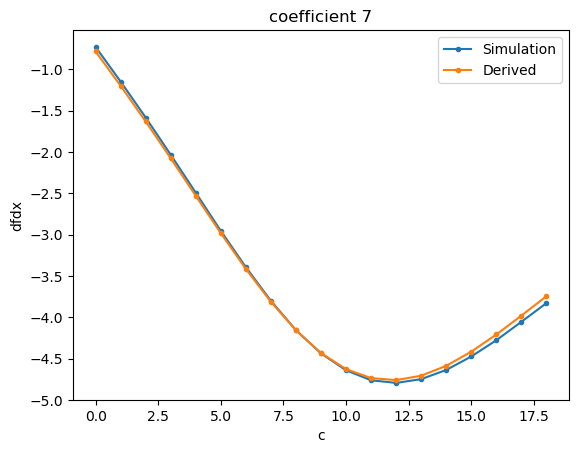

PyObject <matplotlib.legend.Legend object at 0x14753eb38>

In [40]:
Data=[257.494 -57.9172 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0208651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
256.765 -98.8022 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0308651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
255.617 -141.126 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0408651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
254.034 -185.054 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0508651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
252 -230.254 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0608651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
249.507 -275.863 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0708651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
246.552 -320.552 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0808651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
243.158 -362.59 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.0908651 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
239.357 -400.131 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.100865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
235.201 -431.443 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.110865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
230.764 -455.114 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.120865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
226.123 -470.318 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.130865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
221.361 -476.839 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.140865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
216.567 -475.13 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.150865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
211.819 -466.155 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.160865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
207.182 -451.229 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.170865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
202.708 -431.89 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.180865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
198.431 -409.696 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.190865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
194.377 -386.169 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.200865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
190.549 -362.678 0.02 0.00323427 -0.0036511 -0.00328862 1.86859 -0.0151025 0.00869677 0.0392888 0.210865 -0.00974756 0.00951588 -0.0155885 -0.0462425 0.0253224 0.320578 -0.000565778 0.393577 -0.0193007 -0.00627945 -0.0216111 0.0228098 0.046964 0.00675911 -0.0132726 0.017624 -0.0106915 
]
rho1=Data[1:end-1,1]
rho2=Data[2:end,1]
g1=Data[1:end-1,2]
g2=Data[2:end,2]
plot(rho2-rho1,".-",label="Simulation")
plot((g2+g1)/2*0.01,".-",label="Derived")
ylabel("dfdx")
xlabel("c")
title("coefficient 7")
legend()